# Analisis SIMCE en el rendimiento escolar en Chile

## Introduccion

Según la agencia educación la definición del SIMCE es Sistema de Medición de la Calidad de la Educación. Creado en 1968, es una prueba estandarizada administrada por el Ministerio de Educación para evaluar a los estudiantes y su rendimiento académico, con el fin de determinar el nivel de educación en Chile.

Con nuestro proyecto no solo queremos comparar la calidad de educacion a traves de los años, si no que tambien ver si existe alguna correlacion entre el nivel de formacion y que tan vulnerable sea un sector.

## Contexto y Motivacion

La educacion es una herramienta que abre muchas ventanas, pero su mala administracion puede dejar a muchos en desigualdad de oportunidades, incluso llegando a reflejar las inequidades sociales de un pais. En nuestro pais Chile sabemos que hay un esfuerzo de parte del gobierno en mejorar nuestro sistema, por ejemplo con las ya mencionadas evaluaciones SIMCE. Realmente nos interesa contribuir al mejoramiento del sistema de educacion ya que juega un papel importante en el acceso a educacion superior y al de un empleo digno.

Las cifras que vamos a analizar no son solo informes. Representan historias de niños y jovenes con realidades muy distintas. Queremos entender el impacto de factores como vulnerabilidad y ruralidad afectan los puntajes y aprendizajes de los estudiantes e incluso evidenciar si al pasar del tiempo estas diferencias se mantienen.

Deseamos generar un cambio a traves de nuestro analisis. Es muy facil llegar y ver que existen desigualdades en el sistema educativo pero queremos profundizar en el origen de estos problemas. Nuestra motivacion existe en investigar las posibles disparidades del sistema de educacion usando bases de datos publicas del gobierno y asi saber que areas clave necesitan un enfoque de efuerzos para potencialmente mejorar el nivel de educacion. La educación es el arma más poderosa que puedes usar para cambiar el mundo." (Mandela).

## Analisis exploratorio de datos

La pagina oficial del ministerio de educacion contiene todos los datos que necesitamos para este estudio, los puntajes SIMCE a nivel nacional, y ademas contiene variables valiosas para comparar mejor nuestros resultados.

Para cumplir nuestros objetivos dejamos guardados para en el analisis **6 archivos** conteniendo varios datos para extraer que nos serviran para el analisis conteniendo los siguientes cursos:

- `Cuartos Basicos 2014`
- `Cuartos Basicos 2016`
- `Cuartos Basicos 2022`
- `Sextos Basicos 2016`
- `Octavos Basicos 2019`
- `Segundos Medios 2022`

Al estar todos en el formato .xlsx, la libreria **pandas** sera critica en la lectura y manejo rapido de estos datos. Cada uno de estos archivos tienen varias columnas con datos que nos interesan comparar:

- `nom_rbd` | Nombre del establecimiento
- `cod_grupo` | Grado socioeconomico
- `cod_rural_rbd` | Codigo de ruralidad
- `nom_reg_rbd` | Nombre de la region
- `nom_com_rbd` | Nombre de la comuna
- `nom_pro_rbd` | Nombre de la provincia
- `prom_lect` | Promedio de lectura
- `prom_mate` | Promedio de matematicas

Cabe destacar que `prom_lect` y `prom_mate` tienen distintas extensiones segun el curso.

## Glosario

**cod_grupo**:
- 1.0 = Bajo
- 2.0 = Medio bajo
- 3.0 = Medio
- 4.0 = Medio alto
- 5.0 = Alto

**cod_rural**:
- 1.0 = Urbano
- 2.0 = Rural

**cod_depe2**:
- 1.0 = Municipal
- 2.0 = Particular subvencionado
- 3.0 = Particular pagado
- 4.0 = Servicio local de educacion

Para poder empezar con nuestro analisis, tendremos que importar las librerias a usar y leer los archivos.

In [ ]:
# imports a usar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
pd.set_option('future.no_silent_downcasting', True)

cuarto2014 = "data/2014/simce4b2014_rbd_publica_final.xlsx"
cuarto2016 = "data/2016/simce4b2016_rbd_publica_final.xlsx"
sexto2016 = "data/2016/simce6b2016_rbd_publica_final.xlsx"
octavo2019 = "data/2019/simce8b2019_rbd.xlsx"
cuarto2022 = "data/2022/Simce4b2022_rbd_final.xlsx"
segundo2022 = "data/2022/Simce2m2022_rbd_final.xlsx"

def filtrar(df, lect: str, mate: str) -> pd.DataFrame:
    filtrado = ['nom_rbd', 'agno', 'cod_grupo','cod_rural_rbd','nom_reg_rbd','nom_com_rbd','nom_pro_rbd','cod_depe2',lect,mate]
    return df[filtrado]

# cuartos basicos:
df14_4 = pd.read_excel(cuarto2014)
df14_4 = filtrar(df14_4, 'prom_lect4b_rbd', 'prom_mate4b_rbd')

df16_4 = pd.read_excel(cuarto2016)
df16_4 = filtrar(df16_4, 'prom_lect4b_rbd', 'prom_mate4b_rbd')

df22_4 = pd.read_excel(cuarto2022)
df22_4 = filtrar(df22_4, 'prom_lect4b_rbd', 'prom_mate4b_rbd')

# sexto basico 2016
df16_6 = pd.read_excel(sexto2016)
df16_6 = filtrar(df16_6, 'prom_lect6b_rbd', 'prom_mate6b_rbd')

# octavo basico 2019
df19_8 = pd.read_excel(octavo2019)
df19_8 = filtrar(df19_8, 'prom_lect8b_rbd', 'prom_mate8b_rbd')

# segundo medio 2022
df22_ii = pd.read_excel(segundo2022)
df22_ii = filtrar(df22_ii, 'prom_lect2m_rbd', 'prom_mate2m_rbd')

Para revisar si hay algunas cosas que no concuerdan, revisaremos como esta cada dataframe.

In [39]:
df14_4

,nom_rbd,agno,cod_grupo,cod_rural_rbd,nom_reg_rbd,nom_com_rbd,nom_pro_rbd,cod_depe2,prom_lect4b_rbd,prom_mate4b_rbd
0,JOVINA NARANJO FERNANDEZ,2014,Medio,Urbano,REGIÓN ARICA - PARINACOTA,ARICA,ARICA,Municipal,274.0,262.0
1,COLEGIO INTEGRADO EDUARDO FREI MONTALVA,2014,Medio,Urbano,REGIÓN ARICA - PARINACOTA,ARICA,ARICA,Municipal,255.0,239.0
2,ESCUELA REPUBLICA DE ISRAEL,2014,Medio,Urbano,REGIÓN ARICA - PARINACOTA,ARICA,ARICA,Municipal,261.0,250.0
3,ESCUELA REPUBLICA DE FRANCIA,2014,Medio,Urbano,REGIÓN ARICA - PARINACOTA,ARICA,ARICA,Municipal,234.0,207.0
4,ESC. GRAL. PEDRO LAGOS MARCHANT,2014,Bajo,Urbano,REGIÓN ARICA - PARINACOTA,ARICA,ARICA,Municipal,284.0,270.0
...,...,...,...,...,...,...,...,...,...,...
7662,COLEGIO INTERCULTURAL LEONARDO DA VINCI,2014,Medio bajo,Urbano,REGIÓN DE VALPARAÍSO,CASABLANCA,VALPARAÍSO,Particular subvencionado,252.0,215.0
7663,COLEGIO NIRVANA,2014,Medio bajo,Urbano,REGIÓN DE TARAPACÁ,ALTO HOSPICIO,IQUIQUE,Particular subvencionado,235.0,221.0
7664,COLEGIO SAN JUAN,2014,Medio bajo,Urbano,REGIÓN DE LOS LAGOS,ANCUD,CHILOÉ,Particular subvencionado,225.0,201.0
7665,CENTRO EDUCACIONAL RAICES DE MI TIERRA,2014,Medio bajo,Urbano,REGIÓN DE LOS LAGOS,DALCAHUE,CHILOÉ,Particular subvencionado,241.0,230.0


In [3]:
df16_4

,nom_rbd,agno,cod_grupo,cod_rural_rbd,nom_reg_rbd,nom_com_rbd,nom_pro_rbd,cod_depe2,prom_lect4b_rbd,prom_mate4b_rbd
0,JOVINA NARANJO FERNANDEZ,2016,Medio,Urbano,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,Municipal,274.0,257.0
1,COLEGIO INTEGRADO EDUARDO FREI MONTALVA,2016,Medio bajo,Urbano,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,Municipal,271.0,259.0
2,ESCUELA REPUBLICA DE ISRAEL,2016,Medio,Urbano,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,Municipal,291.0,298.0
3,ESCUELA REPUBLICA DE FRANCIA,2016,Medio bajo,Urbano,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,Municipal,243.0,235.0
4,ESC. GRAL. PEDRO LAGOS MARCHANT,2016,Medio bajo,Urbano,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,Municipal,257.0,236.0


In [40]:
df22_4

,nom_rbd,agno,cod_grupo,cod_rural_rbd,nom_reg_rbd,nom_com_rbd,nom_pro_rbd,cod_depe2,prom_lect4b_rbd,prom_mate4b_rbd
0,ESCUELA RURAL ALEJANDRO VASQUEZ BALDEVELLANO,2022,1.0,2,DE LOS LAGOS,SAN PABLO,OSORNO,1,0.0,0.0
1,ESC. BASICA ALTO MECO,2022,1.0,2,DE LA ARAUCANÍA,LAUTARO,CAUTÍN,1,239.0,218.0
2,ESCUELA HÉROES DE CHILE,2022,2.0,1,DEL BIOBÍO,YUMBEL,BIOBÍO,1,222.0,211.0
3,ESCUELA BASICA LOS OLIVOS,2022,1.0,2,DE ÑUBLE,RÁNQUIL,ITATA,1,276.0,250.0
4,COLEGIO WILLIAM JAMES,2022,4.0,1,DE VALPARAÍSO,VIÑA DEL MAR,VALPARAÍSO,3,264.0,231.0
...,...,...,...,...,...,...,...,...,...,...
7205,ESCUELA PARTICULAR DAGOBERTO GODOY,2022,2.0,2,DE LA ARAUCANÍA,SAAVEDRA,CAUTÍN,2,238.0,225.0
7206,ESCUELA PEHUENCO,2022,1.0,2,DE LA ARAUCANÍA,VICTORIA,MALLECO,1,0.0,0.0
7207,ESCUELA BASICA CERRO PILQUE,2022,3.0,2,DEL BIOBÍO,ANTUCO,BIOBÍO,1,0.0,0.0
7208,ESCUELA BASICA FLORIDA,2022,2.0,1,DEL BIOBÍO,FLORIDA,CONCEPCIÓN,4,269.0,252.0


In [41]:
df16_6

,nom_rbd,agno,cod_grupo,cod_rural_rbd,nom_reg_rbd,nom_com_rbd,nom_pro_rbd,cod_depe2,prom_lect6b_rbd,prom_mate6b_rbd
0,JOVINA NARANJO FERNANDEZ,2016,Medio,Urbano,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,Municipal,266.0,259.0
1,COLEGIO INTEGRADO EDUARDO FREI MONTALVA,2016,Medio bajo,Urbano,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,Municipal,248.0,233.0
2,ESCUELA REPUBLICA DE ISRAEL,2016,Medio,Urbano,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,Municipal,262.0,247.0
3,ESCUELA REPUBLICA DE FRANCIA,2016,Medio,Urbano,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,Municipal,202.0,204.0
4,ESC. GRAL. PEDRO LAGOS MARCHANT,2016,Medio bajo,Urbano,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,Municipal,237.0,214.0
...,...,...,...,...,...,...,...,...,...,...
7405,COLEGIO INTERCULTURAL LEONARDO DA VINCI,2016,Medio bajo,Urbano,REGION DE VALPARAISO,CASABLANCA,VALPARAÍSO,Particular subvencionado,217.0,200.0
7406,COLEGIO NIRVANA,2016,Medio bajo,Urbano,REGION DE TARAPACA,ALTO HOSPICIO,IQUIQUE,Particular subvencionado,240.0,214.0
7407,COLEGIO SAN JUAN,2016,Medio bajo,Urbano,REGION DE LOS LAGOS,ANCUD,CHILOÉ,Particular subvencionado,211.0,201.0
7408,CENTRO EDUCACIONAL RAICES DE MI TIERRA,2016,Medio bajo,Urbano,REGION DE LOS LAGOS,DALCAHUE,CHILOÉ,Particular subvencionado,224.0,245.0


In [42]:
df19_8

,nom_rbd,agno,cod_grupo,cod_rural_rbd,nom_reg_rbd,nom_com_rbd,nom_pro_rbd,cod_depe2,prom_lect8b_rbd,prom_mate8b_rbd
0,JOVINA NARANJO FERNANDEZ,2019,3.0,1,DE ARICA Y PARINACOTA,ARICA,ARICA,1,260.0,272.0
1,COLEGIO INTEGRADO EDUARDO FREI MONTALVA,2019,3.0,1,DE ARICA Y PARINACOTA,ARICA,ARICA,1,249.0,259.0
2,ESCUELA REPUBLICA DE ISRAEL,2019,3.0,1,DE ARICA Y PARINACOTA,ARICA,ARICA,1,249.0,275.0
3,ESCUELA REPUBLICA DE FRANCIA,2019,3.0,1,DE ARICA Y PARINACOTA,ARICA,ARICA,1,243.0,245.0
4,ESC. GRAL. PEDRO LAGOS MARCHANT,2019,2.0,1,DE ARICA Y PARINACOTA,ARICA,ARICA,1,201.0,218.0
...,...,...,...,...,...,...,...,...,...,...
5973,CENTRO EDUCACIONAL ALBORADA,2019,2.0,1,DE LOS LAGOS,ANCUD,CHILO,2,223.0,255.0
5974,COLEGIO COSTA CORDILLERA,2019,5.0,1,DE ANTOFAGASTA,ANTOF,ANTOF,3,253.0,284.0
5975,AULA HOSPITALARIA DE ARICA,2019,NaN,1,DE ARICA Y PARINACOTA,ARICA,ARICA,2,NaN,NaN
5976,ESCUELA INTERNACIONAL DE LIDERES CORONE,2019,5.0,1,METROPOLITANA DE SANT,MAIPÚ,SANTI,3,216.0,271.0


In [43]:
df22_ii

,nom_rbd,agno,cod_grupo,cod_rural_rbd,nom_reg_rbd,nom_com_rbd,nom_pro_rbd,cod_depe2,prom_lect2m_rbd,prom_mate2m_rbd
0,LICEO POLITECNICO ARICA,2022,1.0,1,DE ARICA Y PARINACOTA,ARICA,ARICA,4,218.0,242.0
1,LICEO ALBERTO HURTADO,2022,3.0,1,METROPOLITANA DE SANTIAGO,QUINTA NORMAL,SANTIAGO,2,230.0,232.0
2,LICEO POLIV.SAN JOSE DE LA PRECIOSA SANG,2022,3.0,1,METROPOLITANA DE SANTIAGO,QUINTA NORMAL,SANTIAGO,2,254.0,271.0
3,COLEGIO BICENTENARIO ELVIRA HURTADO DE MATTE D...,2022,3.0,1,METROPOLITANA DE SANTIAGO,QUINTA NORMAL,SANTIAGO,2,250.0,286.0
4,CENTRO EDUCACIONAL ALBERTO HURTADO,2022,2.0,1,METROPOLITANA DE SANTIAGO,QUINTA NORMAL,SANTIAGO,2,221.0,227.0
...,...,...,...,...,...,...,...,...,...,...
2971,LICEO GUILLERMO LABARCA HUBERTSON,2022,1.0,1,METROPOLITANA DE SANTIAGO,QUINTA NORMAL,SANTIAGO,1,225.0,218.0
2972,LICEO POLITECNICO,2022,2.0,1,METROPOLITANA DE SANTIAGO,QUINTA NORMAL,SANTIAGO,1,225.0,233.0
2973,LICEO BICENTENARIO DE EXCELENCIA DE DALCAHUE,2022,1.0,1,DE LOS LAGOS,DALCAHUE,CHILOÉ,1,217.0,222.0
2974,LICEO TOMAS LAGO,2022,1.0,1,DE ÑUBLE,CHILLÁN VIEJO,DIGUILLÍ,1,220.0,223.0


Antes de pasar a nuestro analisis y preguntas objetivo, queremos estandarizar los datos que se muestran de manera distinta, como el `cod_depe2`, `cod_grupo` y `cod_rural`, los cuales no estan mostrados de manera numerica en los dataframes de 2014 y 2016.

In [8]:
reempDepe = {"Municipal": "1.0","Particular subvencionado": "2.0","Particular pagado": "3.0","Servicio Local de Educación": "4.0"}
reempGrupo = {"Bajo": "1.0","Medio bajo": "2.0","Medio": "3.0","Medio alto": "4.0","Alto": "5.0"}
reempRural = {"Urbano": "1","Rural": "2"}

# 2014
df14_4["cod_depe2"] = pd.to_numeric(df14_4["cod_depe2"].replace(reempDepe))
df14_4["cod_grupo"] = pd.to_numeric(df14_4["cod_grupo"].replace(reempGrupo))
df14_4["cod_rural_rbd"] = pd.to_numeric(df14_4["cod_rural_rbd"].replace(reempRural))

# 2016
df16_4["cod_depe2"] = pd.to_numeric(df16_4["cod_depe2"].replace(reempDepe))
df16_4["cod_grupo"] = pd.to_numeric(df16_4["cod_grupo"].replace(reempGrupo))
df16_4["cod_rural_rbd"] = pd.to_numeric(df16_4["cod_rural_rbd"].replace(reempRural))

df16_6["cod_depe2"] = pd.to_numeric(df16_6["cod_depe2"].replace(reempDepe))
df16_6["cod_grupo"] = pd.to_numeric(df16_6["cod_grupo"].replace(reempGrupo))
df16_6["cod_rural_rbd"] = pd.to_numeric(df16_6["cod_rural_rbd"].replace(reempRural))

Y si ahora abrimos esos dataframes, deberian estar con el tipo de dato corecto.

In [9]:
df14_4.head()

,nom_rbd,agno,cod_grupo,cod_rural_rbd,nom_reg_rbd,nom_com_rbd,nom_pro_rbd,cod_depe2,prom_lect4b_rbd,prom_mate4b_rbd
0,JOVINA NARANJO FERNANDEZ,2014,3.0,1,REGIÓN ARICA - PARINACOTA,ARICA,ARICA,1.0,274.0,262.0
1,COLEGIO INTEGRADO EDUARDO FREI MONTALVA,2014,3.0,1,REGIÓN ARICA - PARINACOTA,ARICA,ARICA,1.0,255.0,239.0
2,ESCUELA REPUBLICA DE ISRAEL,2014,3.0,1,REGIÓN ARICA - PARINACOTA,ARICA,ARICA,1.0,261.0,250.0
3,ESCUELA REPUBLICA DE FRANCIA,2014,3.0,1,REGIÓN ARICA - PARINACOTA,ARICA,ARICA,1.0,234.0,207.0
4,ESC. GRAL. PEDRO LAGOS MARCHANT,2014,1.0,1,REGIÓN ARICA - PARINACOTA,ARICA,ARICA,1.0,284.0,270.0


In [10]:
df16_4.head()

,nom_rbd,agno,cod_grupo,cod_rural_rbd,nom_reg_rbd,nom_com_rbd,nom_pro_rbd,cod_depe2,prom_lect4b_rbd,prom_mate4b_rbd
0,JOVINA NARANJO FERNANDEZ,2016,3.0,1,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,1.0,274.0,257.0
1,COLEGIO INTEGRADO EDUARDO FREI MONTALVA,2016,2.0,1,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,1.0,271.0,259.0
2,ESCUELA REPUBLICA DE ISRAEL,2016,3.0,1,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,1.0,291.0,298.0
3,ESCUELA REPUBLICA DE FRANCIA,2016,2.0,1,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,1.0,243.0,235.0
4,ESC. GRAL. PEDRO LAGOS MARCHANT,2016,2.0,1,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,1.0,257.0,236.0


In [11]:
df16_6.head()

,nom_rbd,agno,cod_grupo,cod_rural_rbd,nom_reg_rbd,nom_com_rbd,nom_pro_rbd,cod_depe2,prom_lect6b_rbd,prom_mate6b_rbd
0,JOVINA NARANJO FERNANDEZ,2016,3.0,1,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,1.0,266.0,259.0
1,COLEGIO INTEGRADO EDUARDO FREI MONTALVA,2016,2.0,1,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,1.0,248.0,233.0
2,ESCUELA REPUBLICA DE ISRAEL,2016,3.0,1,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,1.0,262.0,247.0
3,ESCUELA REPUBLICA DE FRANCIA,2016,3.0,1,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,1.0,202.0,204.0
4,ESC. GRAL. PEDRO LAGOS MARCHANT,2016,2.0,1,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,1.0,237.0,214.0


Con los dataframes leidos y organizados, podemos pasar a la siguiente parte del analisis.

# Preguntas Objetivo
Segun nuestra propuesta inicial, existen muchas variables distintas en los dataframes que ayudan a la comparacion de los distintos institutos educacionales en Chile. Consideramos que las siguientes preguntas de investigacion ayudarian mucho a nuestra causa:

### 1. ¿Los resultados SIMCE varian significativamente por comuna?
### 2. ¿Como afecto la pandemia los resultados de la prueba?
### 3. ¿Existe una mejora o un deterioro en los puntajes al pasar de los años?
### 4. ¿Existe una diferencia notable entre los puntajes de colegios segun su codigo de dependencia?
### 5. ¿Las generaciones (4to-6to-8vo-2do) mantienen su puntaje al pasar de los años?
### 6. ¿Afecta el grupo socioeconomico el puntaje SIMCE?

El proposito final es comparar las variables de la tabla para saber DONDE los esfuerzos de ayuda deberian enfocarse. Al haber varios datos que pueden influenciar los puntajes cabe destacar que algunos tienen una mayor influencia que los otros- y ahi es donde habria que poner nuestra atencion.

Ya teniendo los dataframes preparados, cada miembro de nuestro grupo se dividio para responder a las incognitas, asi que si la escritura del lenguaje del codigo varia es debido a la diversidad en nuestro manejo de python.

# Analisis de datos

## Pregunta 1 - ¿Los resultados SIMCE varian significativamente por comuna?

Para poder responder si es que los resultados varian por comuna, podemos empezar sacando la media y desviacion estandar de cada dataframe extraido. 

In [12]:
# se agrupan los excel en nombre region y nombre comuna ademas de calcular el promedio por columna y su desviacion estandar

df14_mean_4 = df14_4.groupby(['nom_reg_rbd', 'nom_com_rbd'])[['prom_lect4b_rbd', 'prom_mate4b_rbd']].mean().reset_index()
df14_mean_4.columns = ['nom_reg_rbd', 'nom_com_rbd', 'prom_lect4b_rbd','prom_mate4b_rbd']
df14_mean_4['prom_lect4b_rbd'], df14_mean_4['prom_mate4b_rbd'] = round(df14_mean_4['prom_lect4b_rbd'], 2), round(df14_mean_4['prom_mate4b_rbd'], 2)

df16_mean_6 = df16_6.groupby(['nom_reg_rbd', 'nom_com_rbd'])[['prom_lect6b_rbd', 'prom_mate6b_rbd']].mean().reset_index()
df16_mean_6.columns = ['nom_reg_rbd', 'nom_com_rbd', 'prom_lect6b_rbd','prom_mate6b_rbd']
df16_mean_6['prom_lect6b_rbd'], df16_mean_6['prom_mate6b_rbd'] = round(df16_mean_6['prom_lect6b_rbd'], 2), round(df16_mean_6['prom_mate6b_rbd'], 2)

df16_mean_4 = df16_4.groupby(['nom_reg_rbd', 'nom_com_rbd'])[['prom_lect4b_rbd', 'prom_mate4b_rbd']].mean().reset_index()
df16_mean_4.columns = ['nom_reg_rbd', 'nom_com_rbd', 'prom_lect4b_rbd','prom_mate4b_rbd']
df16_mean_4['prom_lect4b_rbd'], df16_mean_4['prom_mate4b_rbd'] = round(df16_mean_4['prom_lect4b_rbd'], 2), round(df16_mean_4['prom_mate4b_rbd'], 2)

df19_mean = df19_8.groupby(['nom_reg_rbd', 'nom_com_rbd'])[['prom_lect8b_rbd', 'prom_mate8b_rbd']].mean().reset_index()
df19_mean.columns = ['nom_reg_rbd', 'nom_com_rbd', 'prom_lect8b_rbd', 'prom_mate8b_rbd']
df19_mean['prom_lect8b_rbd'], df19_mean['prom_mate8b_rbd'] = round(df19_mean['prom_lect8b_rbd'], 2), round(df19_mean['prom_mate8b_rbd'], 2)

df22_mean_4 = df22_4.groupby(['nom_reg_rbd', 'nom_com_rbd'])[['prom_lect4b_rbd', 'prom_mate4b_rbd']].mean().reset_index()
df22_mean_4.columns = ['nom_reg_rbd', 'nom_com_rbd', 'prom_lect4b_rbd','prom_mate4b_rbd']
df22_mean_4['prom_lect4b_rbd'], df22_mean_4['prom_mate4b_rbd'] = round(df22_mean_4['prom_lect4b_rbd'], 2), round(df22_mean_4['prom_mate4b_rbd'], 2)

df22_mean_2 = df22_ii.groupby(['nom_reg_rbd', 'nom_com_rbd'])[['prom_lect2m_rbd', 'prom_mate2m_rbd']].mean().reset_index()
df22_mean_2.columns = ['nom_reg_rbd', 'nom_com_rbd', 'prom_lect2m_rbd','prom_mate2m_rbd']
df22_mean_2['prom_lect2m_rbd'], df22_mean_2['prom_mate2m_rbd'] = round(df22_mean_2['prom_lect2m_rbd'], 2), round(df22_mean_2['prom_mate2m_rbd'], 2)

# obtenemos el promedio en las dos pruebas y se eliminan los que no tienen promedios
df14_mean_4['prom_mate_leng'] = (df14_mean_4['prom_lect4b_rbd'] + df14_mean_4['prom_mate4b_rbd'])/2
df14_mean_4 = df14_mean_4.dropna(subset=['prom_mate_leng'])
df14_mean_4 = df14_mean_4[df14_mean_4['prom_mate_leng'] != 0]
df14_mean_4['curso'] = '4b'

df16_mean_6['prom_mate_leng'] = (df16_mean_6['prom_lect6b_rbd'] + df16_mean_6['prom_mate6b_rbd'])/2
df16_mean_6 = df16_mean_6.dropna(subset=['prom_mate_leng'])
df16_mean_6 = df16_mean_6[df16_mean_6['prom_mate_leng'] != 0]
df16_mean_6['curso'] = '6b'

df16_mean_4['prom_mate_leng'] = (df16_mean_4['prom_lect4b_rbd'] + df16_mean_4['prom_mate4b_rbd'])/2
df16_mean_4 = df16_mean_4.dropna(subset=['prom_mate_leng'])
df16_mean_4 = df16_mean_4[df16_mean_4['prom_mate_leng'] != 0]
df16_mean_4['curso'] = '4b'

df19_mean['prom_mate_leng'] = (df19_mean['prom_lect8b_rbd'] + df19_mean['prom_mate8b_rbd'])/2
df19_mean = df19_mean.dropna(subset=['prom_mate_leng'])
df19_mean = df19_mean[df19_mean['prom_mate_leng'] != 0]
df19_mean['curso'] = '8b'

df22_mean_2['prom_mate_leng'] = (df22_mean_2['prom_lect2m_rbd'] + df22_mean_2['prom_mate2m_rbd'])/2
df22_mean_2 = df22_mean_2.dropna(subset=['prom_mate_leng'])
df22_mean_2 = df22_mean_2[df22_mean_2['prom_mate_leng'] != 0]
df22_mean_2['curso'] = '2m'

df22_mean_4['prom_mate_leng'] = (df22_mean_4['prom_lect4b_rbd'] + df22_mean_4['prom_mate4b_rbd'])/2
df22_mean_4 = df22_mean_4.dropna(subset=['prom_mate_leng'])
df22_mean_4 = df22_mean_4[df22_mean_4['prom_mate_leng'] != 0]
df22_mean_4['curso'] = '4b'

# obtenemos la mejor y peor comuna en las dos pruebas en conjunto de cada año
df14_ordenado = df14_mean_4.sort_values(by='prom_mate_leng', ascending=False)
df14_comunas = pd.concat([df14_ordenado.head(2), df14_ordenado.tail(2)], ignore_index=True)
df14_comunas['year'] = 2014

df16_ordenado_6 = df16_mean_6.sort_values(by='prom_mate_leng', ascending=False)
df16_comunas_6 = pd.concat([df16_ordenado_6.head(2), df16_ordenado_6.tail(2)], ignore_index=True)
df16_comunas_6['year'] = 2016

df16_ordenado_4 = df16_mean_4.sort_values(by='prom_mate_leng', ascending=False)
df16_comunas_4 = pd.concat([df16_ordenado_4.head(2), df16_ordenado_4.tail(2)], ignore_index=True)
df16_comunas_4['year'] = 2016

df19_ordenado = df19_mean.sort_values(by='prom_mate_leng', ascending=False)
df19_comunas = pd.concat([df19_ordenado.head(2), df19_ordenado.tail(2)], ignore_index=True)
df19_comunas['year'] = 2019

df19_comunas.loc[df19_comunas['nom_com_rbd'] == 'VITAC', 'nom_com_rbd'] = 'VITACURA'
df19_comunas.loc[df19_comunas['nom_com_rbd'] == 'O\'HIG', 'nom_com_rbd'] = 'O\'HIGGINS'
df19_comunas.loc[df19_comunas['nom_com_rbd'] == 'GENER', 'nom_com_rbd'] = 'GENERAL LAGOS'
df19_comunas.loc[df19_comunas['nom_com_rbd'] == 'CAMAR', 'nom_com_rbd'] = 'CAMARONES'

df22_ordenado_2 = df22_mean_2.sort_values(by='prom_mate_leng', ascending=False)
df22_comunas_2 = pd.concat([df22_ordenado_2.head(2), df22_ordenado_2.tail(2)], ignore_index=True)
df22_comunas_2['year'] = 2022

df22_ordenado_4 = df22_mean_4.sort_values(by='prom_mate_leng', ascending=False)
df22_comunas_4 = pd.concat([df22_ordenado_4.head(2), df22_ordenado_4.tail(2)], ignore_index=True)
df22_comunas_4['year'] = 2022

Con los dataframes agrupados y organizados podemos proceder a graficar los resultados para proceder con el analisis.

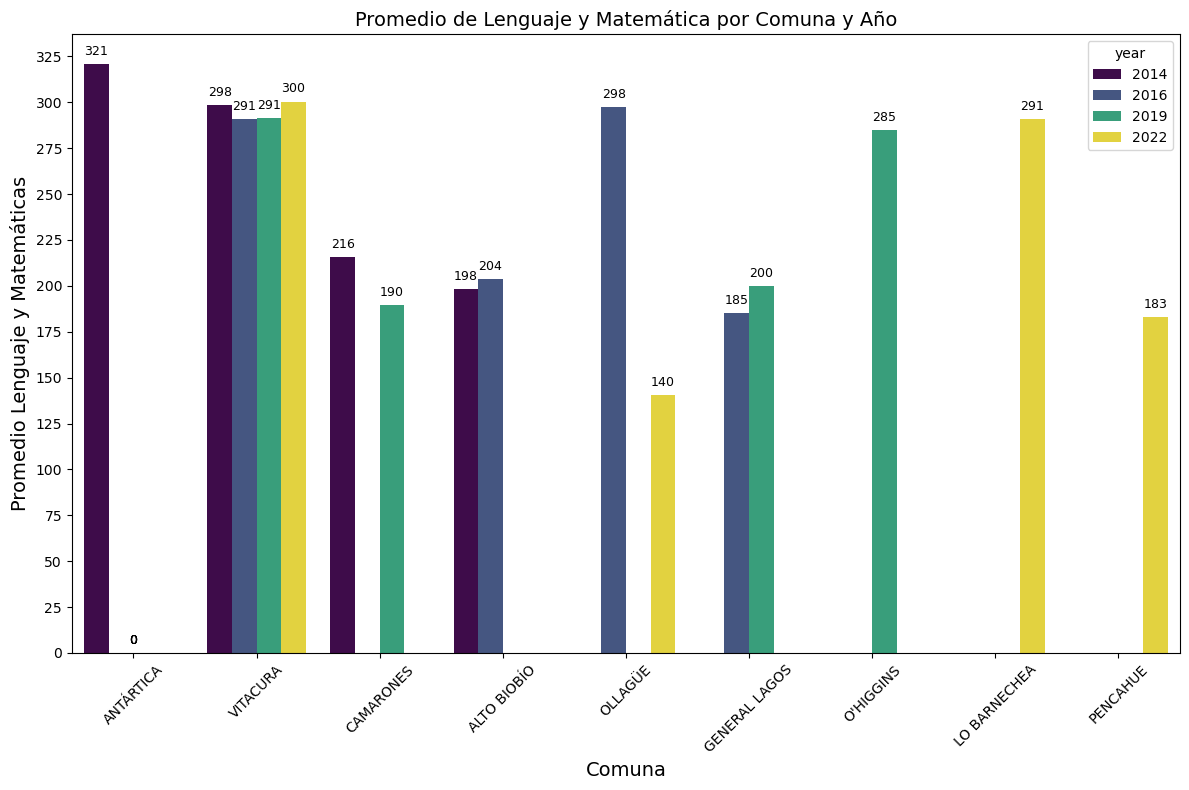

In [13]:
# se comparan distintos años y cursos
df_analisis = pd.concat([df14_comunas, df16_comunas_6, df19_comunas, df22_comunas_2], ignore_index=True)

plt.figure(figsize=(12, 8))

ax = sns.barplot(data=df_analisis, x='nom_com_rbd', y='prom_mate_leng', hue='year', palette='viridis')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,       
            p.get_height() + 5,                   
            f'{p.get_height():.0f}',              
            ha='center',
            fontsize=9)                           


plt.xlabel('Comuna', fontsize=14)
plt.ylabel('Promedio Lenguaje y Matemáticas', fontsize=14)
plt.title('Promedio de Lenguaje y Matemática por Comuna y Año', fontsize=14)

y_values = np.arange(0, 350, 25)  # Crear una secuencia de valores en el eje Y de 50 en 50
plt.yticks(y_values)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

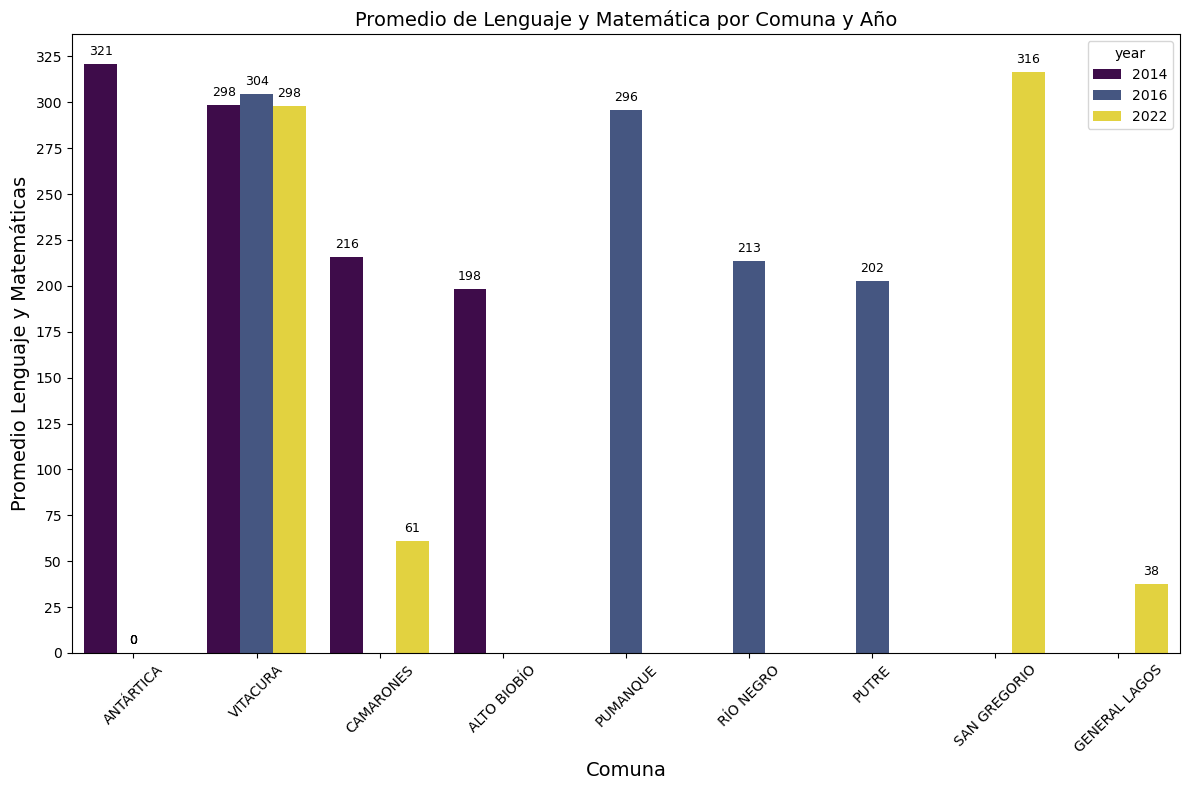

In [14]:
df_analisis = pd.concat([df14_comunas, df16_comunas_4, df22_comunas_4], ignore_index=True)

plt.figure(figsize=(12, 8))

ax = sns.barplot(data=df_analisis, x='nom_com_rbd', y='prom_mate_leng', hue='year', palette='viridis')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,       
            p.get_height() + 5,                   
            f'{p.get_height():.0f}',              
            ha='center',
            fontsize=9)                           


plt.xlabel('Comuna', fontsize=14)
plt.ylabel('Promedio Lenguaje y Matemáticas', fontsize=14)
plt.title('Promedio de Lenguaje y Matemática por Comuna y Año', fontsize=14)

y_values = np.arange(0, 350, 25)  # Crear una secuencia de valores en el eje Y de 50 en 50
plt.yticks(y_values)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

## Analisis(primer grafico)
El grafico anterior muestra las dos mejores y peores comunas en cuanto resultados del simce en matematicas y lenguaje por año, teniendo un total de 9 comunas. En 2014 se analiza un cuarto basico, en 2016 un sexto basico, en 2019 un octavo basico y en 2022 un segundo medio.

### Los resultados indican que:
1. Vitacura se encuentra en las comunas con mejores resultados en el simce en estos años.
2. La comuna de Antartica cuenta con los mejores resultados promedio en el año 2014.
3. Ollague tuvo el mejor resultado en 2016 pero en 2022 ademas se consagra como la comuna con peores resultados en los años estudiados.
4. Camarones, Alto Biobio y General Lagos cuentan como las peores comunas en dos años distintos.

Podemos decir que si existe una diferencia significativa en los resultados SIMCE dependiendo de la comuna donde se realiza.

## Analisis(segundo grafico)
El grafico anterior muestra las dos mejores y peores comunas en cuanto resultados del simce en matematicas y lenguaje por año, teniendo un total de 9 comunas, donde en todos los años se analiza los cuartos basicos.

## Los resultados indican que:
Se comparte el punto 1, 2 y 4 con el primer grafico.

Al analizar el mismo grado de educacion en distintos años comparte resultados con el grafico 1 en cuanto a las comunas con mejores y peores resultados promedio en las pruebas SIMCE.

# Pregunta 2 - ¿Como afecto la pandemia los resultados de la prueba?

Debido a la remotidad de ese periodo, no existen datos sobre los SIMCE del 2020 y 2021, dejandonos el 2019 y el 2022 para comparar estadisticas. Estos años son clave para la comparacion ya que suceden justo **antes** y **despues** de la pandemia.

Montaremos dataframes de esos años para responder la pregunta.

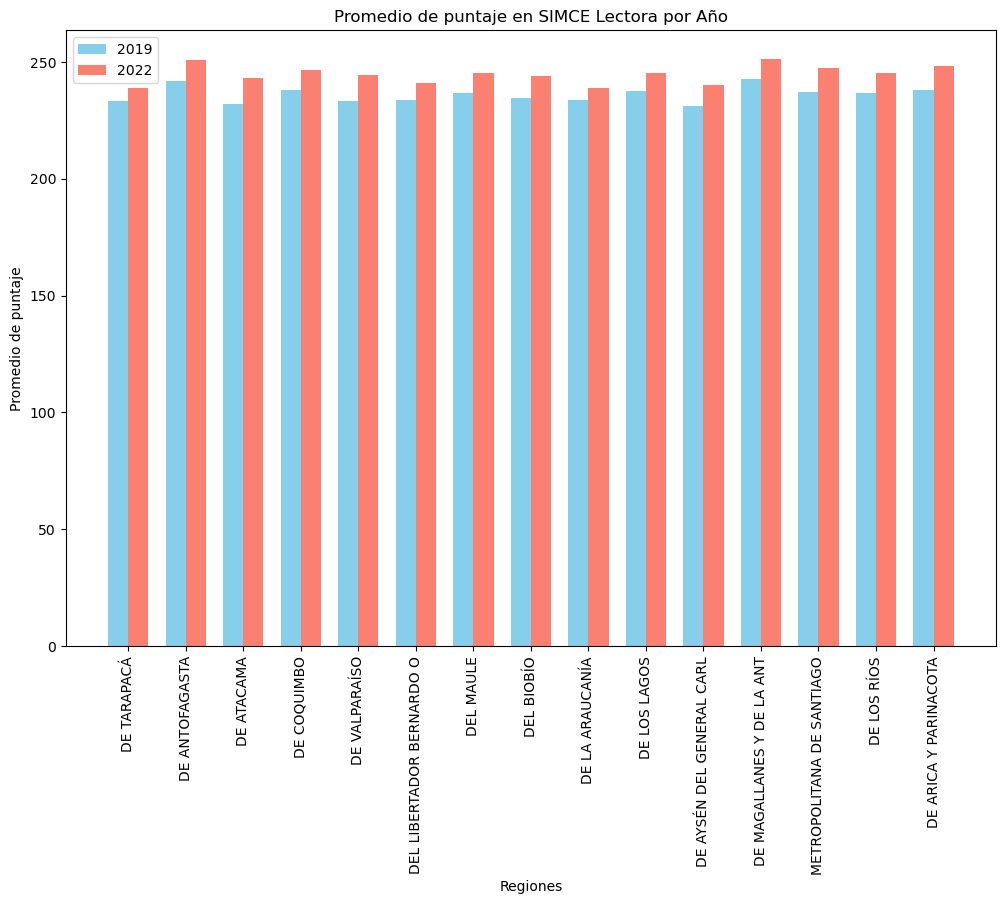

In [15]:
columnas19 = ["nom_rbd", "nom_reg_rbd", "cod_reg_rbd", "prom_lect8b_rbd", "prom_mate8b_rbd"]
df19_8_p2 = pd.read_excel(octavo2019)[columnas19]

promedios19_region_lect = []
promedios19_region_mate = []
for i in range(1, 16):
    df19_region = df19_8_p2[df19_8_p2["cod_reg_rbd"] == i].describe()
    promedios19_region_lect.append(df19_region["prom_lect8b_rbd"]["mean"])
    promedios19_region_mate.append(df19_region["prom_mate8b_rbd"]["mean"])

columnas22 = ["nom_rbd", "nom_reg_rbd", "cod_reg_rbd", "prom_lect2m_rbd", "prom_mate2m_rbd"]
df22_ii_p2 = pd.read_excel(segundo2022)[columnas22]

promedios22_region_lect = []
promedios22_region_mate = []
for i in range(1, 16):
    df22_region = df22_ii_p2[df22_ii_p2["cod_reg_rbd"] == i].describe()
    promedios22_region_lect.append(df22_region["prom_lect2m_rbd"]["mean"])
    promedios22_region_mate.append(df22_region["prom_mate2m_rbd"]["mean"])

regiones = []
for i in range(1, 16):
    nombre_region = df22_ii_p2[df22_ii_p2["cod_reg_rbd"] == i]["nom_reg_rbd"].iloc[0]
    regiones.append(nombre_region)

n_regiones = len(regiones)

x = np.arange(n_regiones)

width = 0.35

fig, ax = plt.subplots(figsize=(12, 8))
barras_2019 = ax.bar(x - width/2, promedios19_region_lect, width, label="2019", color="skyblue")
barras_2022 = ax.bar(x + width/2, promedios22_region_lect, width, label="2022", color="salmon")

ax.set_xlabel("Regiones")
ax.set_ylabel("Promedio de puntaje")
ax.set_title("Promedio de puntaje en SIMCE Lectora por Año")
ax.set_xticks(x)
ax.set_xticklabels(regiones)
ax.set_xticklabels(regiones, rotation=90)
ax.legend()

plt.show()

Los puntajes del SIMCE de **comprension lectora** sorprendientemente subieron entre el 2019 y el 2022 en todas las regiones, aunque no podemos garantizar que el mismo efecto se produce para los resultados matematicos, por lo que es necesario agrupar nuevamente los datos y generar un nuevo analisis.

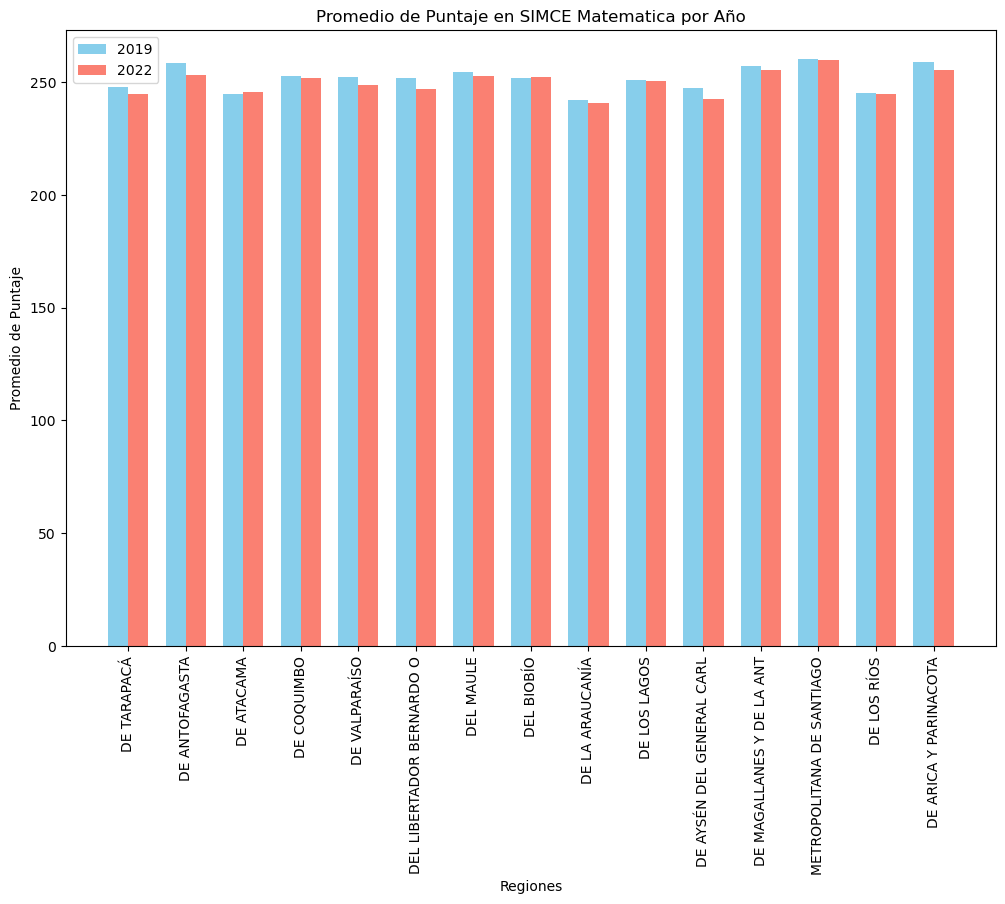

In [16]:
n_regiones = len(regiones)

x = np.arange(n_regiones)

width = 0.35

fig, ax = plt.subplots(figsize=(12, 8))
barras_2019 = ax.bar(x - width/2, promedios19_region_mate, width, label="2019", color="skyblue")
barras_2022 = ax.bar(x + width/2, promedios22_region_mate, width, label="2022", color="salmon")

ax.set_xlabel("Regiones")
ax.set_ylabel("Promedio de Puntaje")
ax.set_title("Promedio de Puntaje en SIMCE Matematica por Año")
ax.set_xticks(x)
ax.set_xticklabels(regiones)
ax.set_xticklabels(regiones, rotation=90)
ax.legend()

plt.show()

A diferencia de comprension lectora, el SIMCE de **matematicas** muestra, en la mayoria de las regiones, un leve decline de promedios post-pandemia. Aunque la diferencia que se muestra no es tan notoria como la de lectura, no se puede negar el descenso de puntajes.

Para responder esta pregunta, si. Los puntajes varian antes y despues de pandemia aunque esa varianza dependio del tipo de prueba. Los puntajes de lectura subieron, y los matematicos bajaron.

# Pregunta 3 - ¿Existe una mejora o un deterioro en los puntajes al pasar de los años?

Ya que queremos comparar cursos de un nivel parecido (debido a que comparar distintos cursos puede crear una gran varianza que puede confundir los datos), lo mejor seria utilizar los datos de los **cuartos basicos**.

In [17]:
prom22_4 = df22_4[['prom_lect4b_rbd','prom_mate4b_rbd']]
prom16_4 = df16_4[['prom_lect4b_rbd','prom_mate4b_rbd']]
prom14_4 = df14_4[['prom_lect4b_rbd','prom_mate4b_rbd']]

# ahora, unimos a todos

dfprom = pd.concat([prom22_4, prom16_4, prom14_4], axis=1)

dfprom.columns = [
    'Lectura_2022_4toB',
    'Matematicas_2022_4toB',
    'Lectura_2016_4toB',
    'Matematicas_2016_4toB',
    'Lectura_2014_4toB',
    'Matematicas_2014_4toB'
]

dfprom.head()

,Lectura_2022_4toB,Matematicas_2022_4toB,Lectura_2016_4toB,Matematicas_2016_4toB,Lectura_2014_4toB,Matematicas_2014_4toB
0,0.0,0.0,274.0,257.0,274.0,262.0
1,239.0,218.0,271.0,259.0,255.0,239.0
2,222.0,211.0,291.0,298.0,261.0,250.0
3,276.0,250.0,243.0,235.0,234.0,207.0
4,264.0,231.0,257.0,236.0,284.0,270.0


Primero, compararemos las **materias** por si solas.

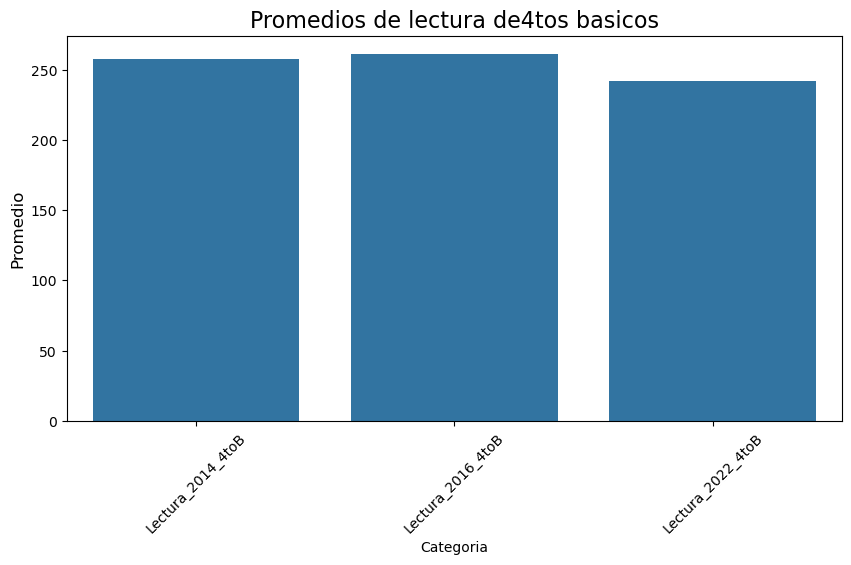

In [18]:
cols_lect = ['Lectura_2014_4toB','Lectura_2016_4toB','Lectura_2022_4toB']

prom_lect = dfprom[cols_lect].mean()
prom_4_lect = prom_lect.reset_index()
prom_4_lect.columns = ['Categoria', 'Promedio']

plt.figure(figsize=(10, 5))
sns.barplot(data=prom_4_lect, x='Categoria', y='Promedio')
plt.title("Promedios de lectura de4tos basicos", fontsize=16)
plt.ylabel("Promedio", fontsize=12)
plt.xticks(rotation=45) 
plt.show()

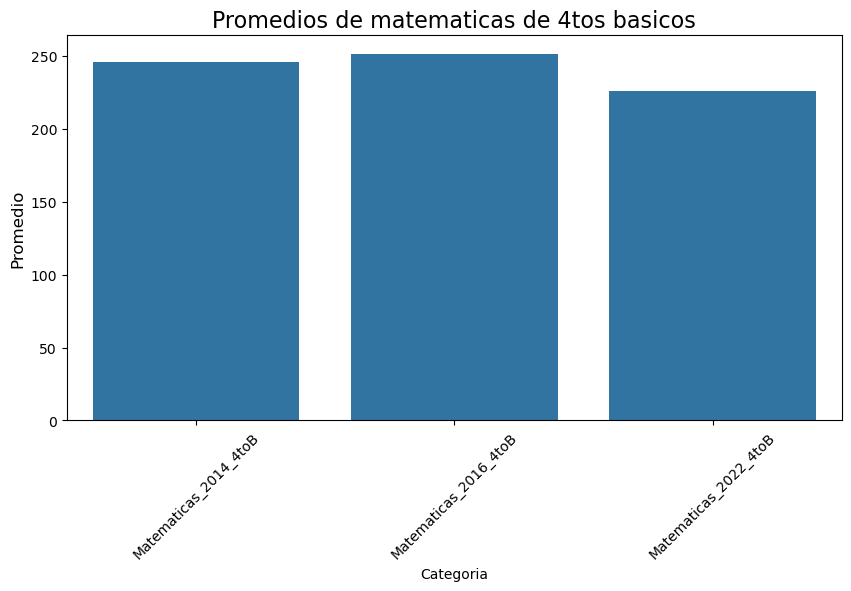

In [19]:
cols_mate = ['Matematicas_2014_4toB','Matematicas_2016_4toB','Matematicas_2022_4toB']

prom_mate = dfprom[cols_mate].mean()
prom_4_mate = prom_mate.reset_index()
prom_4_mate.columns = ['Categoria', 'Promedio']

plt.figure(figsize=(10, 5))
sns.barplot(data=prom_4_mate, x='Categoria', y='Promedio')
plt.title("Promedios de matematicas de 4tos basicos", fontsize=16)
plt.ylabel("Promedio", fontsize=12)
plt.xticks(rotation=45) 
plt.show()

## Analisis
Una simple observacion nos muestra como los resultados bajaron **considerablemente** en los cuartos basicos entre 2016 y 2022. Esto lo podemos dejar mas claro añadiendo un grafico con una regresion lineal R2

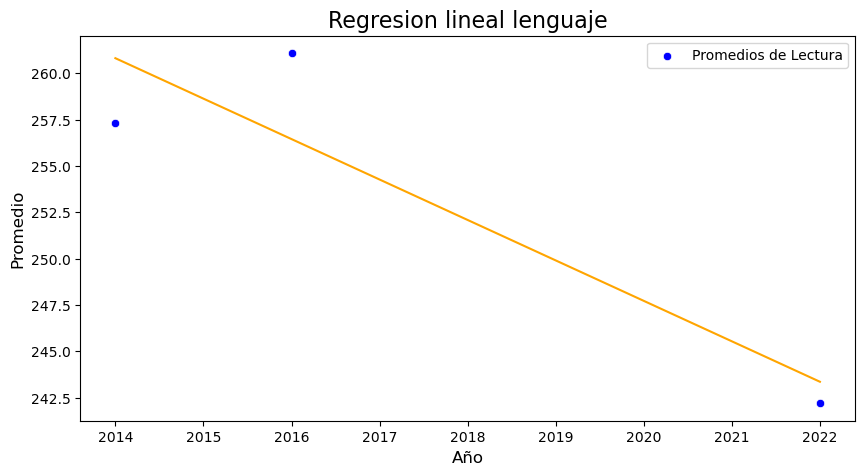

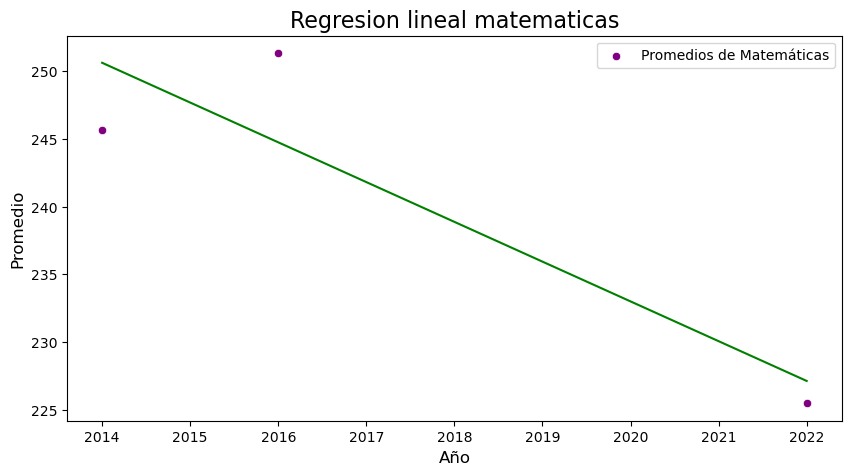

In [20]:
anios = np.array([2014, 2016, 2022])
prom_lect_values = prom_lect.values
prom_mate_values = prom_mate.values 
X = sm.add_constant(anios)

model_lect = sm.OLS(prom_lect_values, X).fit()
model_mate = sm.OLS(prom_mate_values, X).fit()
predicted_lect = model_lect.predict(X)
predicted_mate = model_mate.predict(X)

plt.figure(figsize=(10, 5))
plt.plot(anios, predicted_lect, color='orange')
sns.scatterplot(x=anios, y=prom_lect_values, color='blue', label='Promedios de Lectura')
plt.title("Regresion lineal lenguaje", fontsize=16)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Promedio", fontsize=12)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(anios, predicted_mate, color='green')
sns.scatterplot(x=anios, y=prom_mate_values, color='purple', label='Promedios de Matemáticas')
plt.title("Regresion lineal matematicas", fontsize=16)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Promedio", fontsize=12)
plt.show()

 Esto nos deja mas claro que desde el 2014 al 2022, los puntajes SIMCE han **decaido**. Pero, ¿Cuanto exactamente?

In [21]:
prom_mate, prom_lect

(Matematicas_2014_4toB    245.679023
 Matematicas_2016_4toB    251.316215
 Matematicas_2022_4toB    225.487594
 dtype: float64,
 Lectura_2014_4toB    257.333238
 Lectura_2016_4toB    261.075364
 Lectura_2022_4toB    242.195720
 dtype: float64)

Extrayendo los datos, vemos que del 2016 al 2022 el puntaje promedio bajo en **26 puntos** en matematica, y **19 puntos** en lectura.

A partir de los graficos y el analisis de ellos, podemos concluir que definitivamente los puntajes SIMCE disminuyeron al pasar de los años.

# Pregunta 4 - ¿Existe una diferencia notable entre los puntajes de colegios segun su codigo de dependencia?

Analizaremos si hay una relacion entre el tipo de colegio, si es subencionada, privado o estatal y sus puntajes generados.  
Veremos el promedio de ambos cursos en el tiempo, primero en los años 2014, luego en el 2016 y finalmente 2019. Para luego comparalos en total. Que conste que son los mismos curso de la rendicion del SIMCE. Quiere decir que los estamos siguendo en el tiempo, para ver sumejora, aparte comparamos simpre los 4 basicos para una mayor fiadibilidad de datos.

### Datos 2014

In [22]:
print("data/2014/simce4b2014_rbd_publica_final.xlsx")
print("-"*100)
analizar2014 = pd.read_excel("data/2014/simce4b2014_rbd_publica_final.xlsx")
analizar2014 = analizar2014[["cod_grupo", "prom_lect4b_rbd","prom_mate4b_rbd" ]]
display(analizar2014.head())
print("-"*100)


for x in ["Bajo", "Medio", "Alto"]:
    filtrado = analizar2014[analizar2014["cod_grupo"] == x]
    filtrado_matt= filtrado["prom_mate4b_rbd"].mean()
    filtrado_lenguaje= filtrado["prom_lect4b_rbd"].mean()
    print(f"El promedio en el nivel --{x}-- fue de {filtrado_matt} en matematicas y {filtrado_lenguaje} en lenguaje")
print("-"*100)

data/2014/simce4b2014_rbd_publica_final.xlsx
----------------------------------------------------------------------------------------------------


,cod_grupo,prom_lect4b_rbd,prom_mate4b_rbd
0,Medio,274.0,262.0
1,Medio,255.0,239.0
2,Medio,261.0,250.0
3,Medio,234.0,207.0
4,Bajo,284.0,270.0


----------------------------------------------------------------------------------------------------
El promedio en el nivel --Bajo-- fue de 230.854846566001 en matematicas y 246.51727493917275 en lenguaje
El promedio en el nivel --Medio-- fue de 251.99805194805194 en matematicas y 262.4310793237971 en lenguaje
El promedio en el nivel --Alto-- fue de 287.7401960784314 en matematicas y 291.6332518337408 en lenguaje
----------------------------------------------------------------------------------------------------


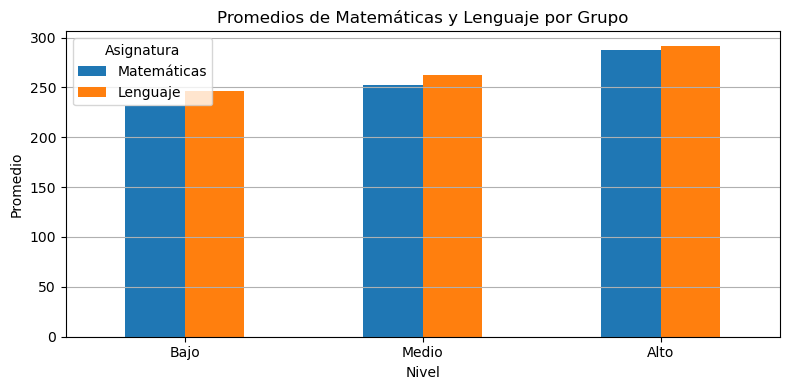

In [23]:
promedios = {}
for x in ["Bajo", "Medio", "Alto"]:
    filtrado = analizar2014[analizar2014["cod_grupo"] == x]
    promedios[x] = {
        "Matemáticas": filtrado["prom_mate4b_rbd"].mean(),
        "Lenguaje": filtrado["prom_lect4b_rbd"].mean()
    }
df_promedios = pd.DataFrame(promedios).T

df_promedios.plot(kind='bar', figsize=(8, 4))
plt.title('Promedios de Matemáticas y Lenguaje por Grupo')
plt.xlabel('Nivel')
plt.ylabel('Promedio')
plt.xticks(rotation=0)
plt.legend(title='Asignatura')
plt.grid(axis='y')


plt.tight_layout()
plt.show()

### Datos 2016

In [24]:
print("data/2016/simce4b2016_rbd_publica_final.xlsx")
print("-"*100)
analizar2016 = pd.read_excel("data/2016/simce4b2016_rbd_publica_final.xlsx")
analizar2016 = analizar2016[["cod_grupo", "prom_lect4b_rbd","prom_mate4b_rbd" ]]
display(analizar2016.head())
print("-"*100)

# FILTRAR
for x in ["Bajo", "Medio", "Alto"]:
    filtrado = analizar2016[analizar2016["cod_grupo"] == x]
    filtrado_matt= filtrado["prom_mate4b_rbd"].mean()
    filtrado_lenguaje= filtrado["prom_lect4b_rbd"].mean()
    print(f"El promedio en el nivel --{x}-- fue de {filtrado_matt} en matematicas y {filtrado_lenguaje} en lenguaje")
print("-"*100)

data/2016/simce4b2016_rbd_publica_final.xlsx
----------------------------------------------------------------------------------------------------


,cod_grupo,prom_lect4b_rbd,prom_mate4b_rbd
0,Medio,274.0,257.0
1,Medio bajo,271.0,259.0
2,Medio,291.0,298.0
3,Medio bajo,243.0,235.0
4,Medio bajo,257.0,236.0


----------------------------------------------------------------------------------------------------
El promedio en el nivel --Bajo-- fue de 235.70483602001113 en matematicas y 251.98171745152354 en lenguaje
El promedio en el nivel --Medio-- fue de 258.4502617801047 en matematicas y 264.9816753926702 en lenguaje
El promedio en el nivel --Alto-- fue de 293.41927710843373 en matematicas y 296.40625 en lenguaje
----------------------------------------------------------------------------------------------------


In [25]:
print("data/2016/simce6b2016_rbd_publica_final.xlsx")
print("-"*100)
analizar2016 = pd.read_excel("data/2016/simce6b2016_rbd_publica_final.xlsx")
analizar2016 = analizar2016[["cod_grupo", "prom_lect6b_rbd","prom_mate6b_rbd" ]]
display(analizar2016.head())
print("-"*100)

# FILTRAR
for x in ["Bajo", "Medio", "Alto"]:
    filtrado = analizar2016[analizar2016["cod_grupo"] == x]
    filtrado_matt= filtrado["prom_mate6b_rbd"].mean()
    filtrado_lenguaje= filtrado["prom_lect6b_rbd"].mean()
    print(f"El promedio en el nivel --{x}-- fue de {filtrado_matt} en matematicas y {filtrado_lenguaje} en lenguaje")
print("-"*100)

data/2016/simce6b2016_rbd_publica_final.xlsx
----------------------------------------------------------------------------------------------------


,cod_grupo,prom_lect6b_rbd,prom_mate6b_rbd
0,Medio,266.0,259.0
1,Medio bajo,248.0,233.0
2,Medio,262.0,247.0
3,Medio,202.0,204.0
4,Medio bajo,237.0,214.0


----------------------------------------------------------------------------------------------------
El promedio en el nivel --Bajo-- fue de 227.03287380699894 en matematicas y 236.9720464135021 en lenguaje
El promedio en el nivel --Medio-- fue de 248.63288590604026 en matematicas y 247.71793149764943 en lenguaje
El promedio en el nivel --Alto-- fue de 290.95497630331755 en matematicas y 277.48578199052133 en lenguaje
----------------------------------------------------------------------------------------------------


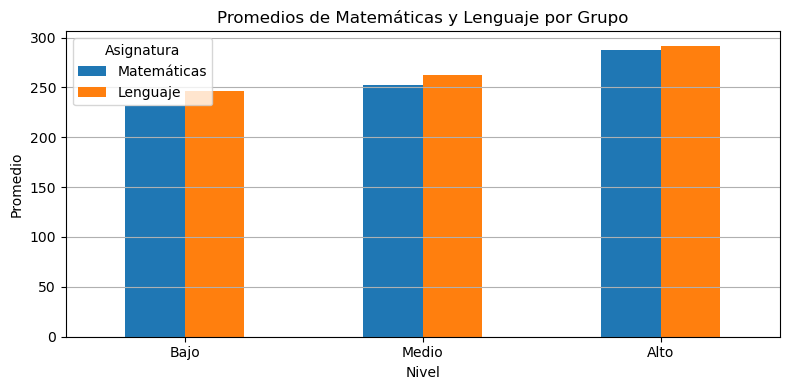

In [26]:
promedios = {}
for x in ["Bajo", "Medio", "Alto"]:
    filtrado = analizar2014[analizar2014["cod_grupo"] == x]
    promedios[x] = {
        "Matemáticas": filtrado["prom_mate4b_rbd"].mean(),
        "Lenguaje": filtrado["prom_lect4b_rbd"].mean()
    }

df_promedios = pd.DataFrame(promedios).T

df_promedios.plot(kind='bar', figsize=(8, 4))
plt.title('Promedios de Matemáticas y Lenguaje por Grupo')
plt.xlabel('Nivel')
plt.ylabel('Promedio')
plt.xticks(rotation=0)
plt.legend(title='Asignatura')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Datos 2019

In [27]:
print("data/2019/simce8b2019_rbd.xlsx")
print("-"*100)
analizar2019 = pd.read_excel("data/2019/simce8b2019_rbd.xlsx")

analizar2019 = analizar2019[["cod_grupo", "prom_lect8b_rbd","prom_mate8b_rbd" ]]
display(analizar2019.head())
print("-"*100)

# FILTRAR
for x in [1.0, 2.0, 3.0]:
    filtrado = analizar2019[analizar2019["cod_grupo"] == x]
    filtrado_matt= filtrado["prom_mate8b_rbd"].mean()
    filtrado_lenguaje= filtrado["prom_lect8b_rbd"].mean()
    print(f"El promedio en el nivel --{x}-- fue de {filtrado_matt} en matematicas y {filtrado_lenguaje} en lenguaje")
print("-"*100)

data/2019/simce8b2019_rbd.xlsx
----------------------------------------------------------------------------------------------------


,cod_grupo,prom_lect8b_rbd,prom_mate8b_rbd
0,3.0,260.0,272.0
1,3.0,249.0,259.0
2,3.0,249.0,275.0
3,3.0,243.0,245.0
4,2.0,201.0,218.0


----------------------------------------------------------------------------------------------------
El promedio en el nivel --1.0-- fue de 234.56357388316152 en matematicas y 224.69897084048029 en lenguaje
El promedio en el nivel --2.0-- fue de 243.03680981595093 en matematicas y 227.31132075471697 en lenguaje
El promedio en el nivel --3.0-- fue de 258.8744507219084 en matematicas y 239.82172002510987 en lenguaje
----------------------------------------------------------------------------------------------------


### Datos 2022

In [28]:
print("data/2022/Simce4b2022_rbd_final.xlsx")
print("-"*100)
analizar2022 = pd.read_excel("data/2022/Simce4b2022_rbd_final.xlsx")

analizar2022 = analizar2022[["cod_grupo", "prom_lect4b_rbd","prom_mate4b_rbd" ]]
display(analizar2022.head())
print("-"*100)

# FILTRAR
for x in {1.0: "Bajo", 2.0: "Medio", 3.0: "Alto"}:
    filtrado = analizar2022[analizar2022["cod_grupo"] == x]
    filtrado_matt= filtrado["prom_mate4b_rbd"].mean()
    filtrado_lenguaje= filtrado["prom_lect4b_rbd"].mean()
    print(f"El promedio en el nivel --{x}-- fue de {filtrado_matt} en matematicas y {filtrado_lenguaje} en lenguaje")
print("-"*100)

data/2022/Simce4b2022_rbd_final.xlsx
----------------------------------------------------------------------------------------------------


,cod_grupo,prom_lect4b_rbd,prom_mate4b_rbd
0,1.0,0.0,0.0
1,1.0,239.0,218.0
2,2.0,222.0,211.0
3,1.0,276.0,250.0
4,4.0,264.0,231.0


----------------------------------------------------------------------------------------------------
El promedio en el nivel --1.0-- fue de 186.32640787315472 en matematicas y 201.73853711790392 en lenguaje
El promedio en el nivel --2.0-- fue de 226.01798410706817 en matematicas y 242.85213032581453 en lenguaje
El promedio en el nivel --3.0-- fue de 239.20474777448072 en matematicas y 257.59655377302437 en lenguaje
----------------------------------------------------------------------------------------------------


In [29]:
print("data/2022/Simce2m2022_rbd_final.xlsx")
print("-"*100)

analizar2022 = pd.read_excel("data/2022/Simce2m2022_rbd_final.xlsx")

analizar2022 = analizar2022[["cod_grupo", "prom_lect2m_rbd","prom_mate2m_rbd" ]]
display(analizar2022.head())
print("-"*100)
# FILTRAR
for x in {1.0: "Bajo", 2.0: "Medio", 3.0: "Alto"}:
    filtrado = analizar2022[analizar2022["cod_grupo"] == x]
    filtrado_matt= filtrado["prom_mate2m_rbd"].mean()
    filtrado_lenguaje= filtrado["prom_lect2m_rbd"].mean()
    print(f"El promedio en el nivel --{x}-- fue de {filtrado_matt} en matematicas y {filtrado_lenguaje} en lenguaje")
print("-"*100)

data/2022/Simce2m2022_rbd_final.xlsx
----------------------------------------------------------------------------------------------------


,cod_grupo,prom_lect2m_rbd,prom_mate2m_rbd
0,1.0,218.0,242.0
1,3.0,230.0,232.0
2,3.0,254.0,271.0
3,3.0,250.0,286.0
4,2.0,221.0,227.0


----------------------------------------------------------------------------------------------------
El promedio en el nivel --1.0-- fue de 222.11818181818182 en matematicas y 222.3030303030303 en lenguaje
El promedio en el nivel --2.0-- fue de 237.0698224852071 en matematicas y 235.08165680473374 en lenguaje
El promedio en el nivel --3.0-- fue de 256.5 en matematicas y 250.95217391304348 en lenguaje
----------------------------------------------------------------------------------------------------


Tras el analisis, hubo un gran diferencia entre los colegios de nivel bajo, medio y alto. Pero logramos que este diferencia se va a cortando con los años. Los puntajes en promedio son de 10 pts superior por categoria. Los de bajo tiene -10 que los medio y los altos tienen un +10 en puntaje, en promedio. Aunque cuando los alumnos son mas chico hay una diferencia mayor. 

# Pregunta 5 - ¿Las generaciones (4to-6to-8vo-2do) mantienen su puntaje al pasar de los años?



Como nuestros datos contienen los dataframes de generaciones pasando de curso a curso (4to, 6to, 8vo y 2ndo como dice la pregunta) es bastante sencillo obtener una respuesta. La clave esta en comparar los dataframes de cada uno de esos cursos y crear un histograma que compare el rendimiento de cada generacion.

In [30]:
df14_4_p5 = pd.read_excel("data/2014/simce4b2014_rbd_publica_final.xlsx")
columnas = ['nom_rbd','prom_lect4b_rbd','prom_mate4b_rbd','agno']
df14_4_p5 = df14_4_p5[columnas]

df16_6_p5 = pd.read_excel("data/2016/simce6b2016_rbd_publica_final.xlsx")
columnas = ['nom_rbd','prom_lect6b_rbd','prom_mate6b_rbd','agno']
df16_6_p5 = df16_6_p5[columnas]

df19_8_p5 = pd.read_excel('data/2019/simce8b2019_rbd.xlsx')
columnas = ['nom_rbd','prom_lect8b_rbd','prom_mate8b_rbd','agno']
df19_8_p5 = df19_8_p5[columnas]

df22_ii_p5 = pd.read_excel("data/2022/Simce2m2022_rbd_final.xlsx")
columnas = ['nom_rbd','prom_lect2m_rbd','prom_mate2m_rbd',"agno"]
df22_ii_p5 = df22_ii_p5[columnas]

dfs = [df22_ii_p5, df14_4_p5, df16_6_p5, df19_8_p5]

for i in range(len(dfs)):
    num = (i + 1) * 2
    if i == 0:
        columnas = [f"prom_lect{num}m_rbd", f"prom_mate{num}m_rbd"]
    else:
        columnas = [f"prom_lect{num}b_rbd", f"prom_mate{num}b_rbd"]
    obj = dfs[i]
    obj["prom_ptjs"] = obj[columnas].mean(axis=1)
    obj.rename(columns={columnas[0]: "prom_lect", columnas[1]: "prom_mate"}, inplace=True)

Al tener los dataframes de los 4 cursos que nos interesan podemos continuar con la graficacion y analisis.

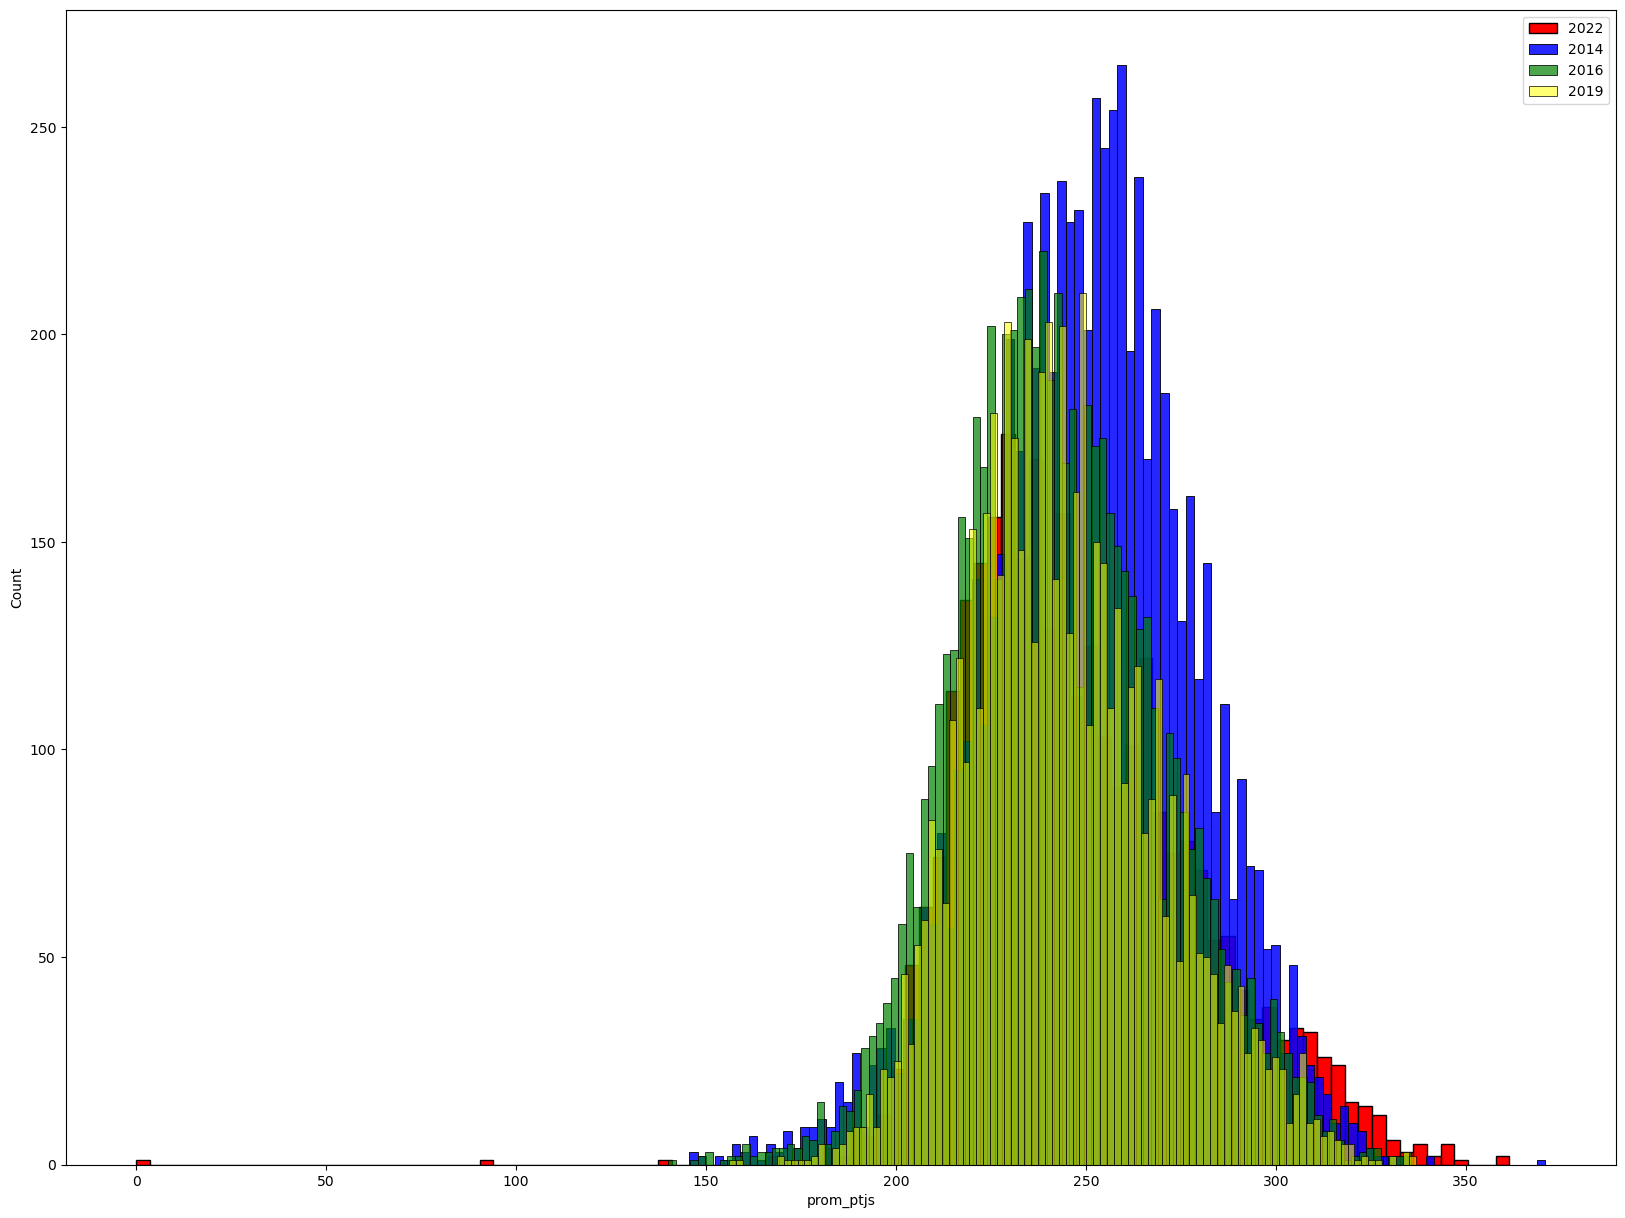

In [31]:
plt.figure(figsize=(20,15))
colors = ("red","blue","green","yellow")

alpha = 1
contador = 0
for df in dfs:
    sns.histplot(data=df, x="prom_ptjs", label=df["agno"][0], color=colors[contador], alpha=alpha, fill=True, bins=100)
    contador += 1
    alpha -= 0.15
plt.legend();

Es un poco confuso analizar los datos cuando estan muy mezclados entre si, asi que es mejor dividir los graficos y analizarlos uno a uno para luego hacer la comparacion:

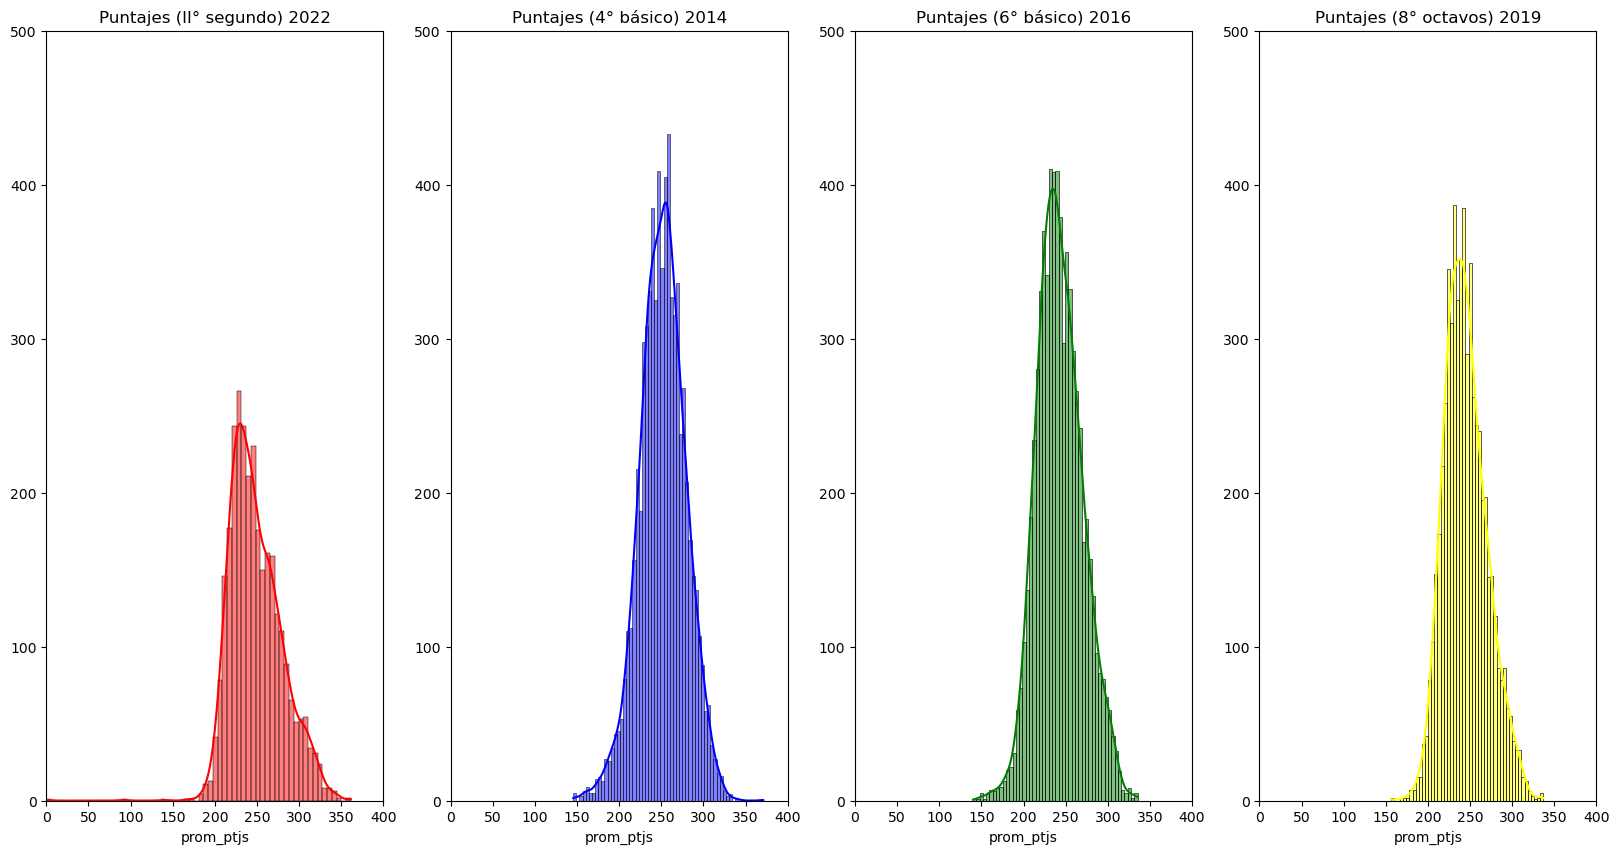

In [32]:
fig, ax = plt.subplots(1,len(dfs), figsize=(20,10))
titles = ("Puntajes (II° segundo) 2022","Puntajes (4° básico) 2014","Puntajes (6° básico) 2016","Puntajes (8° octavos) 2019")
for df in range(len(dfs)):
    sns.histplot(data=dfs[df], x="prom_ptjs", ax=ax[df], color=colors[df], kde=True)
    ax[df].set_title(titles[df])
    ax[df].set_ylim(0,500)
    ax[df].set_xlim(0,400)
    ax[df].set_ylabel("")

Ahora se pueden diferenciar mucho mejor los histogramas de cada periodo y podemos dibujar conclusiones mas adecuadas.

Los graficos de 2014, 2016 y 2019 tienen una cantidad similar y alta de pruebas SIMCE rendidas (eje y: count), mientras que el 2ndo medio de 2022 tiene la cantidad mas baja de pruebas dadas.

La curva se mantiene alrededor de los 250 puntos para todos **menos** el 2ndo medio de 2022, el cual el peak de la curva se concentra un poquito mas abajo. Al mismo tiempo, los minimos y maximos del 2022 se encuentran en puntos un poco mas altos que los demas (entre 170 y 370), mientras que los demas empiezas un poco antes del 150 y terminan antes del 350. En el grafico del 2016 es mas evidente de lo que se habla.

Para visualizarlo de una manera mejor, graficaremos la variacion de puntajes de matematica y lectura.

In [33]:
df_consolidado = pd.concat([df14_4_p5, df16_6_p5, df19_8_p5, df22_ii_p5], ignore_index=True)

df_medias = df_consolidado.groupby("agno")[["prom_mate","prom_lect"]].mean().reset_index()

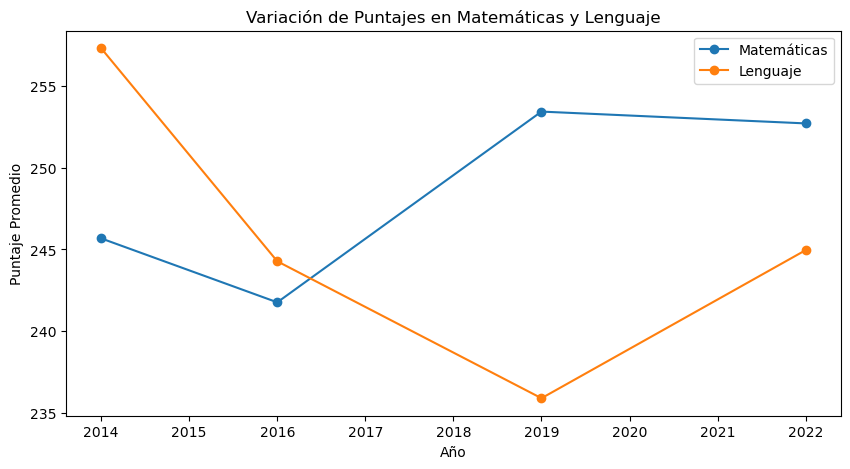

In [34]:
plt.figure(figsize=(10, 5))
plt.plot(df_medias['agno'], df_medias['prom_mate'], marker='o', label='Matemáticas')
plt.plot(df_medias['agno'], df_medias['prom_lect'], marker='o', label='Lenguaje')

plt.xlabel('Año')
plt.ylabel('Puntaje Promedio')
plt.title('Variación de Puntajes en Matemáticas y Lenguaje')
plt.legend()
plt.show()

Con un grafico mas legible de visualizar, podemos concluir lo siguiente respecto a las generaciones:

Los puntajes de matematica **suben** respecto al 2014 y se mantienen despues del 2019, mientras que los de lectura bajan considerablemente respecto al 2014, y suben despues del 2019.

# Pregunta 6 - ¿Afecta el grupo socioeconomico el puntaje SIMCE?

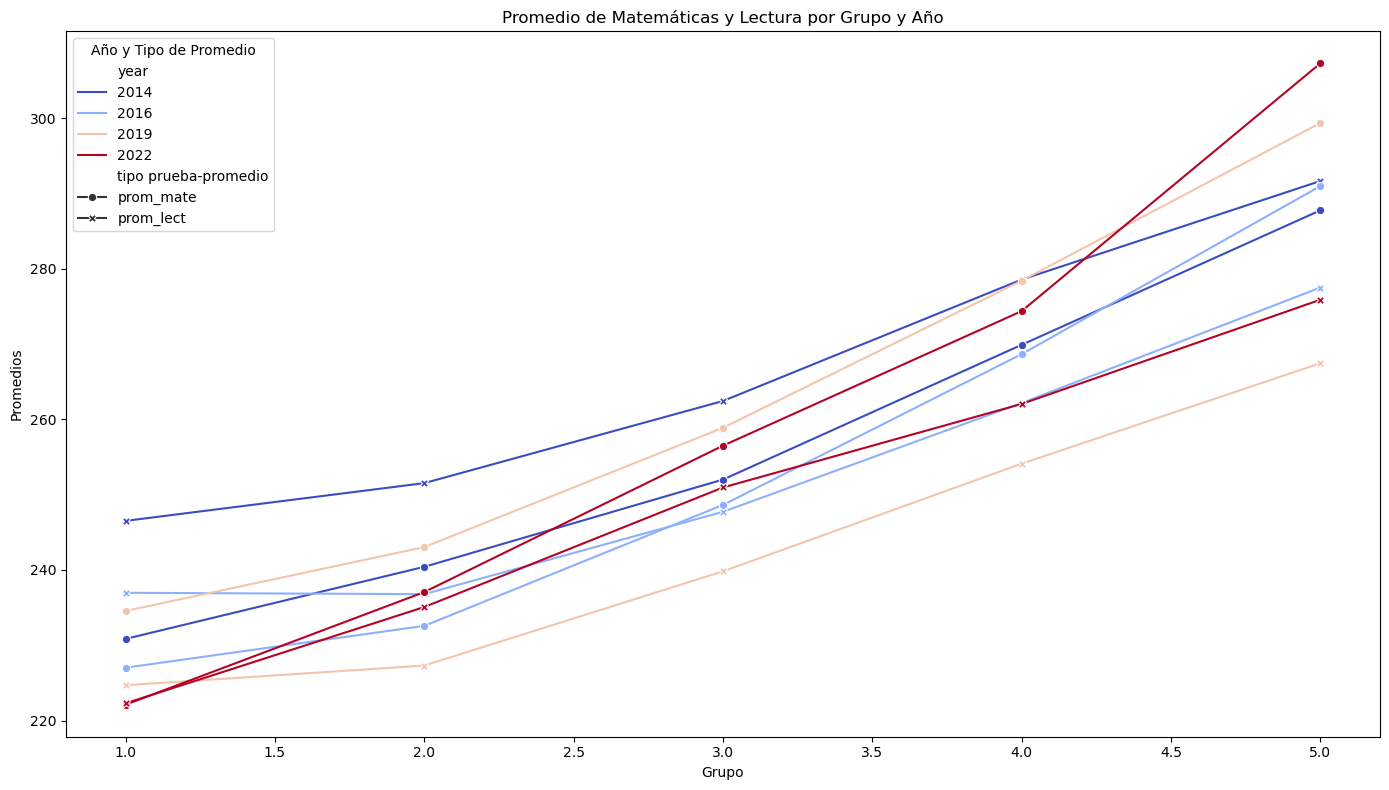

In [35]:
# recibe un df con cod_grupo de tipo object y transforma a int
def estandarizar_cod_grupo(df):
    mapeo_grupos = {
    'Bajo': 1,
    'Medio bajo': 2,
    'Medio': 3,
    'Medio alto': 4,
    'Alto': 5 }
    df['cod_grupo'] = df['cod_grupo'].replace(mapeo_grupos)
    return df

df14_mean = df14_4.groupby('cod_grupo')[['prom_lect4b_rbd', 'prom_mate4b_rbd']].mean().reset_index()
df14_mean.columns = ['cod_grupo', 'prom_lect4b_rbd','prom_mate4b_rbd']
df14_mean = estandarizar_cod_grupo(df14_mean)
df14_mean['prom_lect'], df14_mean['prom_mate'] = round(df14_mean['prom_lect4b_rbd'], 2), round(df14_mean['prom_mate4b_rbd'], 2)
df14_mean['year'] = 2014

df16_mean_6 = df16_6.groupby('cod_grupo')[['prom_lect6b_rbd', 'prom_mate6b_rbd']].mean().reset_index()
df16_mean_6.columns = ['cod_grupo', 'prom_lect6b_rbd','prom_mate6b_rbd']
df16_mean_6 = estandarizar_cod_grupo(df16_mean_6)
df16_mean_6['prom_lect'], df16_mean_6['prom_mate'] = round(df16_mean_6['prom_lect6b_rbd'], 2), round(df16_mean_6['prom_mate6b_rbd'], 2)
df16_mean_6['year'] = 2016

df16_mean_4 = df16_4.groupby('cod_grupo')[['prom_lect4b_rbd', 'prom_mate4b_rbd']].mean().reset_index()
df16_mean_4.columns = ['cod_grupo', 'prom_lect4b_rbd','prom_mate4b_rbd']
df16_mean_4 = estandarizar_cod_grupo(df16_mean_4)
df16_mean_4['prom_lect'], df16_mean_4['prom_mate'] = round(df16_mean_4['prom_lect4b_rbd'], 2), round(df16_mean_4['prom_mate4b_rbd'], 2)
df16_mean_4['year'] = 2016

df19_mean = df19_8.groupby('cod_grupo')[['prom_lect8b_rbd', 'prom_mate8b_rbd']].mean().reset_index()
df19_mean.columns = ['cod_grupo', 'prom_lect8b_rbd', 'prom_mate8b_rbd']
df19_mean['prom_lect'], df19_mean['prom_mate'] = round(df19_mean['prom_lect8b_rbd'], 2), round(df19_mean['prom_mate8b_rbd'], 2)
df19_mean['year'] = 2019

df22_mean_2 = df22_ii.groupby('cod_grupo')[['prom_lect2m_rbd', 'prom_mate2m_rbd']].mean().reset_index()
df22_mean_2.columns = ['cod_grupo', 'prom_lect2m_rbd','prom_mate2m_rbd']
df22_mean_2['prom_lect'], df22_mean_2['prom_mate'] = round(df22_mean_2['prom_lect2m_rbd'], 2), round(df22_mean_2['prom_mate2m_rbd'], 2)
df22_mean_2['year'] = 2022

df22_mean_4 = df22_4.groupby('cod_grupo')[['prom_lect4b_rbd', 'prom_mate4b_rbd']].mean().reset_index()
df22_mean_4.columns = ['cod_grupo', 'prom_lect4b_rbd','prom_mate4b_rbd']
df22_mean_4['prom_lect'], df22_mean_4['prom_mate'] = round(df22_mean_4['prom_lect4b_rbd'], 2), round(df22_mean_4['prom_mate4b_rbd'], 2)
df22_mean_4['year'] = 2022

# se comparan distintos años y cursos
df_graf = pd.concat([df14_mean, df16_mean_6, df19_mean, df22_mean_2], ignore_index=True)

df_long = pd.melt(
    df_graf,
    id_vars=["cod_grupo", "year"],
    value_vars=["prom_mate", "prom_lect"],
    var_name="tipo prueba-promedio",
    value_name="promedio"
)

plt.figure(figsize=(14, 8))

sns.lineplot(
    data=df_long,
    x="cod_grupo",
    y="promedio",
    hue="year",
    style="tipo prueba-promedio",
    markers=True,
    dashes=False,
    palette='coolwarm'
)

plt.xlabel("Grupo")
plt.ylabel("Promedios")
plt.title("Promedio de Matemáticas y Lectura por Grupo y Año")
plt.legend(title="Año y Tipo de Promedio")

plt.tight_layout()
plt.show()

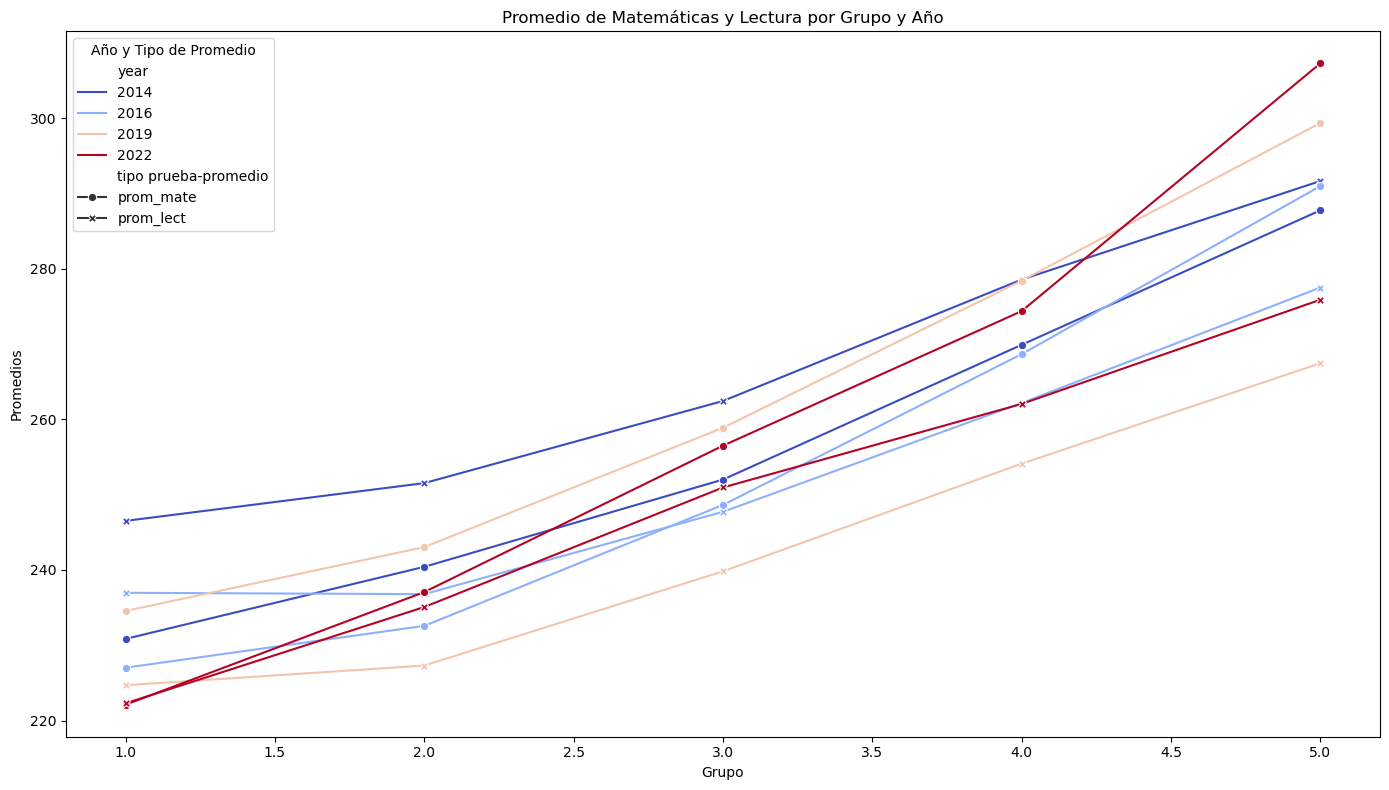

In [36]:
# se comparan distintos años y cursos
df_graf = pd.concat([df14_mean, df16_mean_6, df19_mean, df22_mean_2], ignore_index=True)

df_long = pd.melt(
    df_graf,
    id_vars=["cod_grupo", "year"],
    value_vars=["prom_mate", "prom_lect"],
    var_name="tipo prueba-promedio",
    value_name="promedio"
)

plt.figure(figsize=(14, 8))

sns.lineplot(
    data=df_long,
    x="cod_grupo",
    y="promedio",
    hue="year",
    style="tipo prueba-promedio",
    markers=True,
    dashes=False,
    palette='coolwarm'
)

plt.xlabel("Grupo")
plt.ylabel("Promedios")
plt.title("Promedio de Matemáticas y Lectura por Grupo y Año")
plt.legend(title="Año y Tipo de Promedio")

plt.tight_layout()
plt.show()

## Analisis(primer grafico)
El grafico muestra el promedio de puntaje en las pruebas de matematicas y lenguaje en distintos años y cursos en base a el nivel socioeconomico del establecimiento. Los resultados indican que:

1. El resultado promedio en las pruebas es mejor dependiendo del nivel socioeconomico del establecimiento.
2. En la prueba de lenguaje de 2019 se visualiza el peor rendimiento a nivel general de todos los datos analizados.
3. En la prueba de lenguaje de 2014 se presenta el mejor resultado con diferencia en la prueba para establecimientos de nivel socioeconomico tipo 1.
4. En 2022 en la prueba de matematicas se presenta el mejor resultado con diferencia para establecimientos de nivel tipo 5.

En base al analisis realizado, podemos decir que el nivel socioeconomico influye significativamente en los resultados de la prueba SIMCE obteniendo mejores resultados los establecimiento con un nivel socioeconomico alto(5), mientras que al disminuir el nivel socioeconomico los resultados van en declive.

## Analisis(segundo grafico)
El grafico muestra el promedio de puntaje en las pruebas de matematicas y lenguaje en distintos años y mismo grado en base a el nivel socioeconomico del establecimiento. Los resultados indican que:

Se comparte el punto 1.
1. En la prueba de lenguaje de 2016 se presenta el mejor resultado con diferencia por nivel socioeconomico.
2. La prueba de matematicas en 2022 cuenta con los peores resultados con diferencia en los años estudiados.
3. Podemos ver que en 2014 y 2016 los resultados en las pruebas era mejor en establecimientos de nivel socieconomico 1 y decrecio en cuanto a 2022.

Al analizar el mismo grado de educacion en distintos años hay una diferencia significativa en cuanto a los resultados de la prueba SIMCE dependiendo del nivel socieconomico del establecimiento, donde si es menor este nivel los resultados seran peores a los obtenidos por establecimiento con mejor nivel socioeconomico.

# Resumen de datos

Mientras transformamos y analizamos nuestras bases de datos, pudimos responder nuestras incognitas respecto al tema y nuestro objetivo principal, buscar si existian diferencias significativas segun las variables claves que elegimos (y tambien ver si estas diferencias evolucionan segun el tiempo)

Con nuestros datos apuntamos a crear una diversidad respecto a niveles de cursos y contenidos, incluyendo desde 4to basico a 2ndo medio de pruebas de lectura y matematicas. Para volver a lo que estabamos antes, las variables mas importantes a analizar en base a las distintas preguntas eran estas:

- `cod_grupo` | Grado socioeconomico
- `cod_rural_rbd` | Codigo de ruralidad
- `nom_reg_rbd` | Nombre de la region
- `nom_com_rbd` | Nombre de la comuna
- `nom_pro_rbd` | Nombre de la provincia

Nuestros principales hallazgos fueron los siguientes:

Existian grandes diferencias de puntajes por comuna, por ejemplo las mas privilegiadas como Vitacura tienden a tener mayores puntajes que comunas mas vulnerables como la de Camarones. Esto tambien se puede ver en el indice de ruralidad, donde las zonas rurales tienen menores puntajes que las urbanas.

Luego de la pandemia, los puntajes matematicos **bajaron**, mientras que los de lectura **subieron** implicando que este evento no tuvo los mismos efectos en todas las areas de conocimiento.

A lo largo del tiempo, luego de analizar los mismos cursos (cuartos basicos) al largo de distintos años, hay un leve decline de los puntajes (y las diferencias socioeconomicas se mantienen durante ese tiempo)

Los establecimientos con mayor nivel socioeconómico (nivel 5) y los de dependencia particular pagada presentan consistentemente mejores resultados, mientras que los establecimientos municipales y con niveles socioeconómicos bajos tienden a tener puntajes significativamente menores.

Los datos evidencian una desigualdad de educacion en Chile, donde laos puntajes SIMCE estan influenciadas por el contexto socioeconomico y geografico de cada zona. Aunque se han registrado ciertos avances, como una leve reduccion en la brecha de puntajes por dependencia, persisten barreras estructurales que dificultan la equidad en los resultados educativos. Este analisis refuerza la importancia de focalizar esfuerzos en comunidades rurales, sectores más vulnerables y áreas afectadas por la pandemia para garantizar que la educación sea un motor de igualdad de oportunidades en lugar de reflejar las desigualdades sociales del pais.

# Que podria salir mal?

Puede que la limitacion de datos especialmente post-pandemia, ya que llevamos muy poco tiempo pasado despues de aquel epoca, nos de datos que no necesariamente reflejen la situacion ya sea actual o en un par de años mas. Tambien cabe destacar que hay mas areas que solo la matematica y de lectura que se pueden analizar y seria incorrecto decir que hemos explorado los datos de todas las areas de educacion chilena. 

Tambien solo existe una cantidad limitada de informacion que podemos acceder a traves de dataframes, por ejemplo no tenemos idea de como saber el contexto fuera del colegio de cada joven que realizo estas pruebas. Aunque hallamos investigado mas de 7 mil colegios, no podemos generalizar sobre datos los cuales no tenemos acceso.

Aun asi, creemos que contamos con una base de datos suficientemente grande y de bastantes años para obtener conclusiones acertadas sobre la realidad de nuestro pais, y que los casos limite no deberian influir en como deberiamos acercarnos a las problematicas.

# Asi que nuestra solucion es...

Tras realizar el analisis sobre los datos podemos concluir que las desigualdades del sistema educativo son en su mayoria **sistematicas** pero que tambien existen oportunidades claras para generar cambios para cerrar las brechas existentes.

Hemos identificado tras la exploracion critica de datos los patrones clave que muestran **cuando** y **donde** los puntajes de medicion SIMCE bajan, que destacan en las zonas mas vulnerables y rurales del pais (y no ayuda que la brecha crecio post-pandemia). Propondemos las siguientes acciones como las mas importantes:
- Asignacion de recursos adicionales a las comunas de todo el pais donde se destacan un mayor porcentaje de vulnerabilidad.
- Promover la mejora de los establecimientos publicos de educacion priorizando una mayor calidad de capacitacion de docencia **prioritariamente** en los sectores donde mas se necesiten.
- Crear nuevos tipos de tests educativos que profundizen en el contexto fuera de los establecimientos para saber que otros factores afectan la calidad de enseñanza.

Somos concientes que estas propuestas no son algo que reflejaran cambios a corto plazo pero creemos que, en base a lo investigado, son un excelente punto de partida para cerrar la brecha de disparidad educativa. Lo mas importante sobre todo esto, es que esperamos que nuestro proyecto no sea visto solamente como una exploracion de datos, si no como una guia de donde iniciar cambios para construir un Chile mejor y mas educado.

### Bibliografia
- Portal de Estudios. (2024). “Información estadística” [sitio web]. Recuperado de https://informacionestadistica.agenciaeducacion.cl/#/bases
- Agencia de la Calidad de la Educación. (2024). SIMCE. Recuperado de https://www.agenciaeducacion.cl/simce/#:~:text=Simce%20forma%20parte%20de%20las%20evaluaciones%20que%20se,los%20estudiantes%20del%20pa%C3%ADs%20en%20los%20niveles%20evaluados
- Mandela, N. (s. f.). “La educación es el arma más poderosa que puedes usar para cambiar el mundo. “[Cita].